In [ ]:
!pip3 install matplotlib --upgrade

     |████████████████████████████████| 11.2 MB 5.1 MB/s 
     |████████████████████████████████| 890 kB 63.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


# Statistics Team Competition
Logika UI 2022
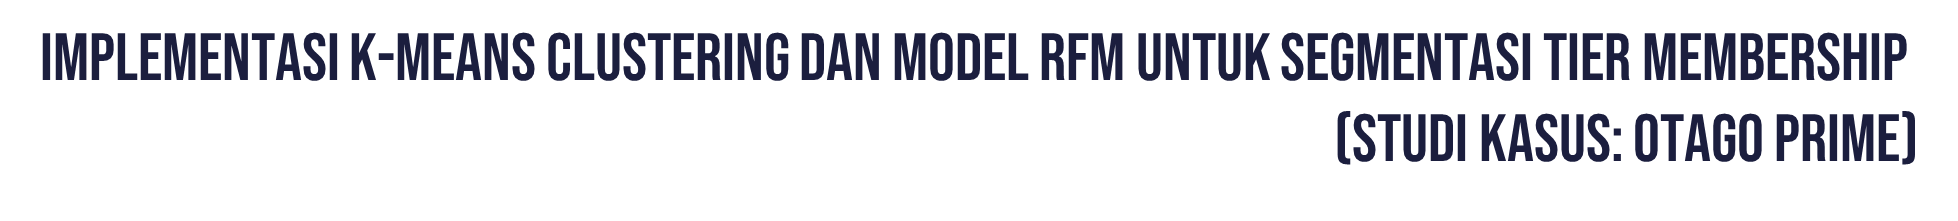

## **Don't forget to upload the files**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json

from tqdm import tqdm

In [ ]:
trial = pd.read_csv('OPC trial.csv')
cs_mast = pd.read_csv('customer_master.csv')

trx_2018 = pd.read_excel('trx_2018.xlsx')
trx_2019 = pd.read_excel('trx_2019.xlsx')
trx_2020 = pd.read_csv('trx_2020.csv')

trx_2018.drop('Unnamed: 0', axis =1, inplace = True)
trx_2019.drop('Unnamed: 0', axis =1, inplace = True)
trx_2020.drop('Unnamed: 0', axis =1, inplace = True)

trx_2018.columns = trx_2020.columns.tolist()
trx_2019.columns = trx_2020.columns.tolist()

In [ ]:
product_data = [
{"id": "1", "category": "Eggs", "brand": "Joe's Farm", "price": "10"},
{"id": "2", "category": "Dairy Products", "brand": "Joe's Farm", "price": "12"},
{"id": "3", "category": "Breads", "brand": "Joe's Farm", "price": "8"},
{"id": "4", "category": "Fruits and Vegetables", "brand": "Joe's Farm", "price": "6"},
{"id": "5", "category": "Sugar and Spices", "brand": "Joe's Farm", "price": "5"},
{"id": "6", "category": "Cooking Oils", "brand": "Joe's Farm", "price": "10"},

{"id": "7", "category": "Eggs", "brand": "Vegetarian Choice", "price": "12"},
{"id": "8", "category": "Dairy Products", "brand": "Vegetarian Choice", "price": "16"},
{"id": "9", "category": "Breads", "brand": "Vegetarian Choice", "price": "12"},
{"id": "10", "category": "Fruits and Vegetables", "brand": "Vegetarian Choice", "price": "10"},
{"id": "11", "category": "Sugar and Spices", "brand": "Vegetarian Choice", "price": "5"},
{"id": "12", "category": "Cooking Oils", "brand": "Vegetarian Choice", "price": "12"},

{"id": "13", "category": "Eggs", "brand": "Auckland's Best", "price": "14"},
{"id": "14", "category": "Dairy Products", "brand": "Auckland's Best", "price": "16"},
{"id": "15", "category": "Breads", "brand": "Auckland's Best", "price": "11"},
{"id": "16", "category": "Fruits and Vegetables", "brand": "Auckland's Best", "price": "12"},
{"id": "17", "category": "Sugar and Spices", "brand": "Auckland's Best", "price": "5"},
{"id": "18", "category": "Cooking Oils", "brand": "Auckland's Best", "price": "13"},

{"id": "19", "category": "Eggs", "brand": "Pure Green", "price": "15"},
{"id": "20", "category": "Dairy Products", "brand": "Pure Green", "price": "18"},
{"id": "21", "category": "Breads", "brand": "Pure Green", "price": "15"},
{"id": "22", "category": "Fruits and Vegetables", "brand": "Pure Green", "price": "12"},
{"id": "23", "category": "Sugar and Spices", "brand": "Pure Green", "price": "6"},
{"id": "24", "category": "Cooking Oils", "brand": "Pure Green", "price": "13"},

{"id": "25", "category": "Eggs", "brand": "Healthree", "price": "20"},
{"id": "26", "category": "Dairy Products", "brand": "Healthree", "price": "22"},
{"id": "27", "category": "Breads", "brand": "Healthree", "price": "16"},
{"id": "28", "category": "Fruits and Vegetables", "brand": "Healthree", "price": "15"},
{"id": "29", "category": "Sugar and Spices", "brand": "Healthree", "price": "8"},
{"id": "30", "category": "Cooking Oils", "brand": "Healthree", "price": "16"},
]

def get_product(i):
  return product_data[i-1]

In [ ]:
trial.tail()

,customer_id,membership_class_trial,result
45,999321881178,Bronze,Satisfactory
46,998466632833,Bronze,Satisfactory
47,998260872973,Bronze,Satisfactory
48,998224796196,Bronze,Satisfactory
49,997879736285,Bronze,Satisfactory


In [ ]:
cs_mast

,customer_id,customer_name,customer_gender,customer_email,customer_region,customer_age,customer_occupation,remarks
0,15269452608,Milton Claire,M,mclaire1tg@fastcompany.com,Auckland,35.0,Pharmacist,NaN
1,17907828364,Cecil Standeven,F,cstandeven2jm@discuz.net,Wellington,54.0,Business Systems Development Analyst,NaN
2,35518518397,NaN,NaN,NaN,Auckland,NaN,NaN,NaN
3,41616997667,Beilul Berrick,F,bberrick5tv@g.co,Auckland,46.0,Engineer I,""" NEW EMAIL ADDRESS"
4,"""",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
8864,2.90424E+11,NaN,NaN,NaN,Christchurch,NaN,NaN,NaN
8865,58939592598,NaN,NaN,NaN,Wellington,NaN,NaN,NaN
8866,55208967246,NaN,NaN,NaN,Wellington,NaN,NaN,NaN
8867,6.66987E+11,Paco Blamire,M,pblamire3jt@ted.com,Wellington,55.0,Cost Accountant,NaN


In [ ]:
cs_mast.isnull().sum()

customer_id               0
customer_name          2172
customer_gender        2172
customer_email         2172
customer_region          18
customer_age           2172
customer_occupation    2172
remarks                8851
dtype: int64

In [ ]:
# removing remarks, 99% nan
cs_mast.drop(['remarks'], axis = 1, inplace = True)

In [ ]:
cs_mast.sort_values(by = 'customer_id')[:20]

,customer_id,customer_name,customer_gender,customer_email,customer_region,customer_age,customer_occupation
4451,NEW EMAIL ADDRESS,NaN,NaN,NaN,NaN,NaN,NaN
6523,"""",NaN,NaN,NaN,NaN,NaN,NaN
8317,"""",NaN,NaN,NaN,NaN,NaN,NaN
285,"""",NaN,NaN,NaN,NaN,NaN,NaN
507,"""",NaN,NaN,NaN,NaN,NaN,NaN
902,"""",NaN,NaN,NaN,NaN,NaN,NaN
632,"""",NaN,NaN,NaN,NaN,NaN,NaN
4605,"""",NaN,NaN,NaN,NaN,NaN,NaN
4487,"""",NaN,NaN,NaN,NaN,NaN,NaN
7820,"""",NaN,NaN,NaN,NaN,NaN,NaN


Removing incorrect customer id name

In [ ]:
for i in range(len(cs_mast)):
  try:
    float(cs_mast['customer_id'][i])
  except:
    cs_mast.drop([i], inplace = True)

In [ ]:
cs_mast['customer_id'] = cs_mast['customer_id'].astype(float)

In [ ]:
print(cs_mast.shape)
cs_mast.sort_values(by = 'customer_id')[:20]

(8851, 7)


,customer_id,customer_name,customer_gender,customer_email,customer_region,customer_age,customer_occupation
2310,2.579917e+08,Minetta Pau,F,mpau1yc@ezinearticles.com,Auckland,29.0,VP Product Management
8007,2.728059e+08,Dionisio Brindle,M,dbrindle2cs@imdb.com,Auckland,51.0,Geologist I
593,4.525937e+08,NaN,NaN,NaN,Auckland,NaN,NaN
4637,4.778588e+08,Aura Bleasdille,F,ableasdille7g2@tmall.com,Christchurch,52.0,Biostatistician III
1422,5.714988e+08,NaN,NaN,NaN,Hamilton,NaN,NaN
8467,7.315345e+08,Dotty Rostron,F,drostron5ip@salon.com,Auckland,26.0,Associate Professor
4217,8.476511e+08,NaN,NaN,NaN,Tauranga,NaN,NaN
3518,1.036093e+09,Sebastien Beesley,M,sbeesley4t0@un.org,Auckland,46.0,Staff Accountant II
5810,1.247431e+09,Flory Antrum,M,fantrum71j@w3.org,Auckland,34.0,Teacher
594,1.496611e+09,Jeramie Wheatman,M,jwheatman5se@weather.com,Wellington,47.0,Structural Analysis Engineer


In [ ]:
cs_mast.isnull().sum()

customer_id               0
customer_name          2154
customer_gender        2154
customer_email         2154
customer_region           0
customer_age           2154
customer_occupation    2154
dtype: int64

In [ ]:
# Dropping cust id with no name , gender, email, age
cs_mast = cs_mast.dropna()

In [ ]:
cs_mast

,customer_id,customer_name,customer_gender,customer_email,customer_region,customer_age,customer_occupation
0,1.526945e+10,Milton Claire,M,mclaire1tg@fastcompany.com,Auckland,35.0,Pharmacist
1,1.790783e+10,Cecil Standeven,F,cstandeven2jm@discuz.net,Wellington,54.0,Business Systems Development Analyst
3,4.161700e+10,Beilul Berrick,F,bberrick5tv@g.co,Auckland,46.0,Engineer I
5,5.233480e+10,Bertrando McAndie,M,bmcandie1jq@wikispaces.com,Wellington,42.0,Mechanical Systems Engineer
6,2.387960e+11,Jyoti McCusker,F,jmccusker3s3@paginegialle.it,Auckland,52.0,Office Assistant I
...,...,...,...,...,...,...,...
8860,7.124449e+10,Drake Hellin,M,dhellin2be@mashable.com,Wellington,63.0,Financial Advisor
8861,4.790380e+11,Harlie Hucke,F,hhucke6c3@marriott.com,Christchurch,22.0,Information Systems Manager
8862,9.064210e+11,Cherey Bradford,F,cbradford7f9@arstechnica.com,Auckland,34.0,Systems Administrator III
8863,8.777610e+11,Brennan Epple,M,bepple3xz@nyu.edu,Wellington,56.0,Project Manager


In [ ]:
cs_mast.isnull().sum()

customer_id            0
customer_name          0
customer_gender        0
customer_email         0
customer_region        0
customer_age           0
customer_occupation    0
dtype: int64

Trx2an

In [ ]:
trx_2018.tail()

,trx_id,trx_date,cust_id,trx_region,purchase
89918,89919,1519461374000,7.245559e+11,Christchurch,"[{'id': 15, 'qty': 3}, {'id': 18, 'qty': 4}, {..."
89919,89920,1515348288000,3.188208e+11,Auckland,"[{'id': 8, 'qty': 3}]"
89920,89921,1538532143000,5.735265e+11,Wellington,"[{'id': 14, 'qty': 3}]"
89921,89922,1516137139000,7.342029e+11,Auckland,"[{'id': 8, 'qty': 1}]"
89922,89923,1521979729000,NaN,Auckland,"[{'id': 8, 'qty': 3}]"


In [ ]:
trx_2019.tail()

,trx_id,trx_date,cust_id,trx_region,purchase
93207,93208,1577344960000,5.689249e+11,Auckland,"[{'id': 19, 'qty': 3}, {'id': 24, 'qty': 5}, {..."
93208,93209,1548582437000,1.441154e+11,Auckland,"[{'id': 8, 'qty': 2}, {'id': 15, 'qty': 2}, {'..."
93209,93210,1576380104000,5.722637e+11,Tauranga,"[{'id': 14, 'qty': 1}]"
93210,93211,1560307223000,3.718436e+11,Tauranga,"[{'id': 3, 'qty': 1}, {'id': 13, 'qty': 3}]"
93211,93212,1552817973000,4.911626e+11,Christchurch,"[{'id': 29, 'qty': 3}]"


In [ ]:
trx_2020.tail()

,trx_id,trx_date,cust_id,trx_region,purchase
99154,99155,09/08/2020,9.698659e+11,Hamilton,"[{'id': 13, 'qty': 5}]"
99155,99156,06/21/2020,5.921282e+11,Wellington,"[{'id': 3, 'qty': 1}, {'id': 14, 'qty': 2}]"
99156,99157,03/23/2020,8.688884e+11,Hamilton,"[{'id': 18, 'qty': 1}]"
99157,99158,10/24/2020,2.830201e+11,Auckland,"[{'id': 7, 'qty': 1}, {'id': 21, 'qty': 4}, {'..."
99158,99159,07/21/2020,4.848189e+10,Tauranga,"[{'id': 12, 'qty': 4}, {'id': 13, 'qty': 1}, {..."


## Data prep

In [ ]:
trx_1819 = pd.concat([trx_2018,trx_2019])

In [ ]:
trx_1819.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183135 entries, 0 to 93211
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   trx_id      183135 non-null  int64  
 1   trx_date    183135 non-null  int64  
 2   cust_id     168603 non-null  float64
 3   trx_region  183135 non-null  object 
 4   purchase    183135 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 8.4+ MB


In [ ]:
trx_1819['trx_date'] = pd.to_datetime(trx_1819['trx_date'], unit = 'ms')

In [ ]:
trx_1819

,trx_id,trx_date,cust_id,trx_region,purchase
0,1,2018-02-04 03:31:48,1.793746e+11,Wellington,"[{'id': 8, 'qty': 3}]"
1,2,2018-10-20 04:34:51,8.916823e+11,Hamilton,"[{'id': 7, 'qty': 1}, {'id': 1, 'qty': 1}, {'i..."
2,3,2018-09-26 01:52:14,1.334625e+11,Auckland,"[{'id': 8, 'qty': 1}]"
3,4,2018-07-03 21:24:51,3.652541e+11,Tauranga,"[{'id': 13, 'qty': 3}]"
4,5,2018-12-01 08:35:19,8.611679e+11,Auckland,"[{'id': 15, 'qty': 2}, {'id': 15, 'qty': 2}]"
...,...,...,...,...,...
93207,93208,2019-12-26 07:22:40,5.689249e+11,Auckland,"[{'id': 19, 'qty': 3}, {'id': 24, 'qty': 5}, {..."
93208,93209,2019-01-27 09:47:17,1.441154e+11,Auckland,"[{'id': 8, 'qty': 2}, {'id': 15, 'qty': 2}, {'..."
93209,93210,2019-12-15 03:21:44,5.722637e+11,Tauranga,"[{'id': 14, 'qty': 1}]"
93210,93211,2019-06-12 02:40:23,3.718436e+11,Tauranga,"[{'id': 3, 'qty': 1}, {'id': 13, 'qty': 3}]"


In [ ]:
# Concating 18 19 20
trx_full = pd.concat([trx_1819,trx_2020])

In [ ]:
trx_full['trx_date'] = pd.to_datetime(trx_full['trx_date'])

In [ ]:
trx_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282294 entries, 0 to 99158
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   trx_id      282294 non-null  int64         
 1   trx_date    282294 non-null  datetime64[ns]
 2   cust_id     264865 non-null  float64       
 3   trx_region  282294 non-null  object        
 4   purchase    282294 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 12.9+ MB


In [ ]:
trx_full.reset_index(inplace = True, drop = True)

In [ ]:
trx_full

,trx_id,trx_date,cust_id,trx_region,purchase
0,1,2018-02-04 03:31:48,1.793746e+11,Wellington,"[{'id': 8, 'qty': 3}]"
1,2,2018-10-20 04:34:51,8.916823e+11,Hamilton,"[{'id': 7, 'qty': 1}, {'id': 1, 'qty': 1}, {'i..."
2,3,2018-09-26 01:52:14,1.334625e+11,Auckland,"[{'id': 8, 'qty': 1}]"
3,4,2018-07-03 21:24:51,3.652541e+11,Tauranga,"[{'id': 13, 'qty': 3}]"
4,5,2018-12-01 08:35:19,8.611679e+11,Auckland,"[{'id': 15, 'qty': 2}, {'id': 15, 'qty': 2}]"
...,...,...,...,...,...
282289,99155,2020-09-08 00:00:00,9.698659e+11,Hamilton,"[{'id': 13, 'qty': 5}]"
282290,99156,2020-06-21 00:00:00,5.921282e+11,Wellington,"[{'id': 3, 'qty': 1}, {'id': 14, 'qty': 2}]"
282291,99157,2020-03-23 00:00:00,8.688884e+11,Hamilton,"[{'id': 18, 'qty': 1}]"
282292,99158,2020-10-24 00:00:00,2.830201e+11,Auckland,"[{'id': 7, 'qty': 1}, {'id': 21, 'qty': 4}, {'..."


**Missing Val Handling**

In [ ]:
trx_full.isnull().sum()

trx_id            0
trx_date          0
cust_id       17429
trx_region        0
purchase          0
dtype: int64

Dropping 17429 NaN customer IDs

In [ ]:
trx_full.drop(trx_full[trx_full['cust_id'].isnull()].index.tolist(),axis = 0, inplace = True)
trx_full.reset_index(inplace = True, drop = True)

In [ ]:
trx_full.isnull().sum()

trx_id        0
trx_date      0
cust_id       0
trx_region    0
purchase      0
dtype: int64

In [ ]:
trx_full

,trx_id,trx_date,cust_id,trx_region,purchase
0,1,2018-02-04 03:31:48,1.793746e+11,Wellington,"[{'id': 8, 'qty': 3}]"
1,2,2018-10-20 04:34:51,8.916823e+11,Hamilton,"[{'id': 7, 'qty': 1}, {'id': 1, 'qty': 1}, {'i..."
2,3,2018-09-26 01:52:14,1.334625e+11,Auckland,"[{'id': 8, 'qty': 1}]"
3,4,2018-07-03 21:24:51,3.652541e+11,Tauranga,"[{'id': 13, 'qty': 3}]"
4,5,2018-12-01 08:35:19,8.611679e+11,Auckland,"[{'id': 15, 'qty': 2}, {'id': 15, 'qty': 2}]"
...,...,...,...,...,...
264860,99155,2020-09-08 00:00:00,9.698659e+11,Hamilton,"[{'id': 13, 'qty': 5}]"
264861,99156,2020-06-21 00:00:00,5.921282e+11,Wellington,"[{'id': 3, 'qty': 1}, {'id': 14, 'qty': 2}]"
264862,99157,2020-03-23 00:00:00,8.688884e+11,Hamilton,"[{'id': 18, 'qty': 1}]"
264863,99158,2020-10-24 00:00:00,2.830201e+11,Auckland,"[{'id': 7, 'qty': 1}, {'id': 21, 'qty': 4}, {'..."


## Adding new features

In [ ]:
# Creating time features
trx_full["jam"] = np.uint8(trx_full["trx_date"].dt.hour)
trx_full["hari"] = trx_full["trx_date"].dt.weekday
trx_full["bulan"] = np.uint8(trx_full["trx_date"].dt.month)
trx_full["tahun"] = trx_full["trx_date"].dt.year
trx_full['tanggal'] = trx_full['trx_date'].dt.day

In [ ]:
# Labelling days
hari_ = {0:"Senin", 1:"Selasa", 2:"Rabu", 3:"Kamis", 4:"Jumat", 5:"Sabtu", 6:"Minggu"}
trx_full['hari'] = [hari_[i] for i in trx_full['hari']]

In [ ]:
# Fixing dictionary format
trx_full['purchase'] = trx_full['purchase'].apply(lambda x: eval(x))

In [ ]:
# Creating total price variable for each trx
trx_full['total_price'] = 0

for i in tqdm(range(len(trx_full))):
  total = 0
  for d in trx_full['purchase'][i]:
    total += float(get_product(d['id'])['price']) * float(d['qty'])
  trx_full['total_price'][i] = total

  0%|          | 0/264865 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 264865/264865 [00:25<00:00, 10208.70it/s]


In [ ]:
get_product(1)['category'] + " - "+ get_product(1)['brand']

"Eggs - Joe's Farm"

In [ ]:
# Feature per item
for i in range(len(product_data)):
  trx_full[f'item_id_{i+1}'] = 0

for i in tqdm(range(len(trx_full))):
  for d in trx_full['purchase'][i]:
    trx_full[f'item_id_{d["id"]}'][i] = d['qty']

  0%|          | 0/264865 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
100%|██████████| 264865/264865 [00:49<00:00, 5353.09it/s]


In [ ]:
# Creating features per item category and brand
trx_full['Eggs'] = 0
trx_full['Dairy Products'] = 0
trx_full['Breads'] = 0
trx_full['Fruits and Vegetables'] = 0
trx_full['Sugar and Spices'] = 0
trx_full['Cooking Oils'] = 0

trx_full["Joe's Farm"] = 0
trx_full['Vegetarian Choice'] = 0
trx_full["Auckland's Best"] = 0
trx_full['Pure Green'] = 0
trx_full['Healthree'] = 0

for i in tqdm(range(len(trx_full))):
  for d in trx_full['purchase'][i]:
    trx_full[get_product(d['id'])['category']][i] += float(d['qty'])
    trx_full[get_product(d['id'])['brand']][i] += float(d['qty'])

  0%|          | 0/264865 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|██████████| 264865/264865 [02:02<00:00, 2159.86it/s]


In [ ]:
trx_full.describe()

,trx_id,cust_id,jam,bulan,tahun,tanggal,total_price,item_id_1,item_id_2,item_id_3,item_id_4,item_id_5,item_id_6,item_id_7,item_id_8,item_id_9,item_id_10,item_id_11,item_id_12,item_id_13,item_id_14,item_id_15,item_id_16,item_id_17,item_id_18,item_id_19,item_id_20,item_id_21,item_id_22,item_id_23,item_id_24,item_id_25,item_id_26,item_id_27,item_id_28,item_id_29,item_id_30,Eggs,Dairy Products,Breads,Fruits and Vegetables,Sugar and Spices,Cooking Oils,Joe's Farm,Vegetarian Choice,Auckland's Best,Pure Green,Healthree
count,264865.000000,2.648650e+05,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000
mean,47165.303536,5.090913e+11,7.310169,6.499285,2019.054503,15.703075,85.761241,0.158081,0.159953,0.091571,0.080033,0.080701,0.078398,0.226768,0.226455,0.226534,0.140842,0.135499,0.130214,0.520227,0.511578,0.514541,0.260733,0.261718,0.265562,0.188168,0.182081,0.185706,0.096796,0.090333,0.089159,0.245185,0.249822,0.250195,0.135197,0.132282,0.132154,1.461137,1.451872,1.388194,0.747056,0.731928,0.726717,0.668401,1.129991,2.527533,0.870681,1.310298
std,27330.670958,2.895427e+11,7.812112,3.445517,0.818172,8.779481,89.908131,0.689418,0.694667,0.551233,0.498629,0.502696,0.496496,0.837864,0.835487,0.837823,0.666697,0.660713,0.643646,1.308248,1.297664,1.302324,0.950193,0.952338,0.965827,0.919142,0.902024,0.913087,0.669597,0.641239,0.635225,1.116521,1.131836,1.134434,0.839199,0.832796,0.832553,2.515132,2.506905,2.508798,1.755852,1.732773,1.735413,1.473943,1.928435,3.075925,2.275483,3.782619
min,1.000000,2.579917e+08,0.000000,1.000000,2018.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23518.000000,2.559305e+11,0.000000,4.000000,2018.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47080.000000,5.125194e+11,5.000000,7.000000,2019.000000,16.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,70644.000000,7.592313e+11,14.000000,9.000000,2020.000000,23.000000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000
max,99159.000000,9.999876e+11,23.000000,12.000000,2020.000000,31.000000,1049.000000,10.000000,12.000000,10.000000,11.00

In [ ]:
# Aggregating per customer

trx_per_cust = trx_full.groupby('cust_id').agg(
             frequency=('trx_id', 'count'),
             monetary=('total_price', 'mean'),
             monetary_sum=('total_price', 'sum'),
             recency = ('trx_date', lambda x: round(((pd.Timestamp('2021-01-31') - x.max()) /np.timedelta64(1, 'M')))),
             item1 = ('item_id_1','sum'),item2 = ('item_id_2','sum'),item3 = ('item_id_3','sum'), item4 = ('item_id_4','sum'),item5 = ('item_id_5','sum'),item6 = ('item_id_6','sum'),
             item7 = ('item_id_7','sum'),item8 = ('item_id_8','sum'),item9 = ('item_id_9','sum'),item10 = ('item_id_10','sum'),item11 = ('item_id_11','sum'), item12 = ('item_id_12','sum'),
             item13 = ('item_id_13','sum'), item14 = ('item_id_14','sum'), item15 = ('item_id_15','sum'), item16 = ('item_id_16','sum'), item17 = ('item_id_17','sum'), item18 = ('item_id_18','sum'),
             item19 = ('item_id_19','sum'),  item20 = ('item_id_20','sum'),item21 = ('item_id_21','sum'),item22 = ('item_id_22','sum'),item23 = ('item_id_23','sum'),item24 = ('item_id_24','sum'),
             item25 = ('item_id_25','sum'), item26 = ('item_id_26','sum'), item27 = ('item_id_27','sum'),item28 = ('item_id_28','sum'), item29 = ('item_id_29','sum'), item30 = ('item_id_30','sum'),
             egg = ('Eggs', 'sum'), dairy = ('Dairy Products', 'sum'), breads = ('Breads', 'sum'), fruit_veg = ('Fruits and Vegetables', 'sum'), sugar_spices = ('Sugar and Spices', 'sum'), cook_oil = ('Cooking Oils', 'sum'),
             joe_farn = ("Joe's Farm", 'sum'), veg_choice = ('Vegetarian Choice', 'sum'),auckland = ("Auckland's Best", 'sum'), pure_green = ("Pure Green", 'sum'), healthree = ('Healthree', 'sum')).reset_index()

In [ ]:
trx_per_cust

,cust_id,frequency,monetary,monetary_sum,recency,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15,item16,item17,item18,item19,item20,item21,item22,item23,item24,item25,item26,item27,item28,item29,item30,egg,dairy,breads,fruit_veg,sugar_spices,cook_oil,joe_farn,veg_choice,auckland,pure_green,healthree
0,2.579917e+08,21,40.000000,840,2,16,11,0,5,12,1,2,2,1,5,1,0,9,4,4,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,28,18,5,12,13,4,47,11,20,0,2
1,2.728059e+08,26,64.538462,1678,2,3,0,9,0,5,5,8,5,14,3,0,0,12,13,24,21,10,1,0,2,4,4,2,0,0,0,0,0,0,0,23,21,51,28,17,6,22,31,81,12,0
2,4.525937e+08,28,38.964286,1091,2,10,12,3,0,8,7,1,8,1,0,4,5,6,7,2,9,14,1,2,0,0,0,0,0,0,0,1,0,0,1,19,27,7,9,28,14,40,19,41,2,2
3,4.778588e+08,27,73.333333,1980,1,8,4,2,4,0,3,2,10,12,11,4,4,12,24,9,2,7,11,4,1,0,0,0,3,0,0,0,0,0,2,27,53,24,17,11,25,21,53,73,8,2
4,5.714988e+08,17,56.941176,968,2,6,14,0,2,3,9,8,8,8,4,0,4,6,2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,24,17,6,3,13,34,32,17,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8846,9.992319e+11,31,77.258065,2395,1,0,2,2,6,0,0,8,11,9,2,5,0,16,32,15,24,10,7,3,11,7,5,0,5,0,0,1,0,0,0,27,60,35,37,15,12,10,35,109,31,1
8847,9.993219e+11,23,33.521739,771,2,8,8,0,6,0,3,7,3,6,4,9,1,6,0,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,21,13,15,11,10,4,27,34,13,0,0
8848,9.994246e+11,16,40.500000,648,1,5,10,3,0,0,6,7,0,3,2,1,0,8,0,4,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,23,10,10,4,1,9,25,17,14,1,0
8849,9.995026e+11,23,34.913043,803,1,2,8,0,1,1,18,4,5,8,1,1,3,0,0,1,5,3,7,0,0,0,0,0,0,1,0,0,0,0,0,7,13,9,9,5,28,30,22,18,0,1


In [ ]:
trx_per_cust.describe()

,cust_id,frequency,monetary,monetary_sum,recency,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15,item16,item17,item18,item19,item20,item21,item22,item23,item24,item25,item26,item27,item28,item29,item30,egg,dairy,breads,fruit_veg,sugar_spices,cook_oil,joe_farn,veg_choice,auckland,pure_green,healthree
count,8.851000e+03,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000,8851.000000
mean,5.037583e+11,29.924867,63.663653,2566.393741,2.105073,4.730539,4.786578,2.740255,2.394984,2.414981,2.346063,6.786013,6.776635,6.779008,4.214665,4.054796,3.896622,15.567732,15.308892,15.397582,7.802395,7.831883,7.946899,5.630889,5.448763,5.557225,2.896622,2.703197,2.668060,7.337137,7.475878,7.487064,4.045758,3.958536,3.954694,43.724325,43.447068,41.541521,22.355553,21.902836,21.746921,20.001808,33.814823,75.636086,26.055022,39.210485
std,2.902490e+11,22.696054,32.023168,5403.041611,1.185233,4.195213,4.210611,3.391912,2.915711,2.902693,2.787807,4.870489,4.835175,4.859399,3.806123,3.822834,3.718459,17.566565,17.351623,17.797632,8.610199,8.574142,8.762330,18.839930,17.685103,18.219781,10.116934,9.264142,9.004197,37.078655,37.632811,37.640460,20.657176,20.259246,20.263498,79.317280,78.270242,80.118182,38.881942,37.240717,37.447420,9.765973,13.633672,75.161640,85.191094,197.606288
min,2.579917e+08,5.000000,18.923077,143.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500987e+11,21.000000,45.955534,973.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,19.000000,14.000000,9.000000,9.000000,8.000000,13.000000,24.000000,24.000000,2.000000,0.000000
50%,5.036946e+11,26.000000,61.185185,1653.000000,2.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,6.000000,6.000000,6.000000,3.000000,3.000000,3.000000,12.000000,12.000000,12.000000,6.000000,6.000000,6.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,28.000000,27.000000,15.000000,15.000000,14.000000,19.000000,33.000000,72.000000,10.000000,1.000000
75%,7.546900e+11,31.000000,70.723636,2097.000000,3.000000,7.000000,7.000000,4.000000,4.000000,4.000000,4.000000,10.000000,10.000000,10.000000,6.000000,6.000000,6.000000,20.000000,20.000000,20.000000,11.000000,11.000000,11.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,40.000000,39.000000,21.000000,21.000000,21.000000,26.000000,42.000000,94.000000,17.000000,4.000000
max,9.999876e+11,177.000000,251.772414,40283.000000,12.000000,30.000000,31.000000,26.000000,21.000000,21.000000,23.000000,40.000000,34.000000,42.000000,27.000000,26.000000,27.000000,175.000000,159.000000,150.000000,99.000000,92.000000,82.000000,188.000000,165.000000,178.000000,104.000000,108.000000,87.000000,314.000000,326.000000,324.000000,189.000000,209.000000,177.000000,666.000000,624.000000,643.000000,341.000000,390.000000,320.000000,67.000000,102.

In [ ]:
cs_mast

,customer_id,customer_name,customer_gender,customer_email,customer_region,customer_age,customer_occupation
0,1.526945e+10,Milton Claire,M,mclaire1tg@fastcompany.com,Auckland,35.0,Pharmacist
1,1.790783e+10,Cecil Standeven,F,cstandeven2jm@discuz.net,Wellington,54.0,Business Systems Development Analyst
3,4.161700e+10,Beilul Berrick,F,bberrick5tv@g.co,Auckland,46.0,Engineer I
5,5.233480e+10,Bertrando McAndie,M,bmcandie1jq@wikispaces.com,Wellington,42.0,Mechanical Systems Engineer
6,2.387960e+11,Jyoti McCusker,F,jmccusker3s3@paginegialle.it,Auckland,52.0,Office Assistant I
...,...,...,...,...,...,...,...
8860,7.124449e+10,Drake Hellin,M,dhellin2be@mashable.com,Wellington,63.0,Financial Advisor
8861,4.790380e+11,Harlie Hucke,F,hhucke6c3@marriott.com,Christchurch,22.0,Information Systems Manager
8862,9.064210e+11,Cherey Bradford,F,cbradford7f9@arstechnica.com,Auckland,34.0,Systems Administrator III
8863,8.777610e+11,Brennan Epple,M,bepple3xz@nyu.edu,Wellington,56.0,Project Manager


In [ ]:
# Merging with cs mast left join
trx_per_cust_plus = trx_per_cust.merge(cs_mast,left_on = 'cust_id', right_on = 'customer_id', how = 'left')

In [ ]:
# Merging with cs mast inner join
trx_per_cust_plus_inner = trx_per_cust.merge(cs_mast,left_on = 'cust_id', right_on = 'customer_id', how = 'inner')

In [ ]:
trx_per_cust_plus_inner.isnull().sum()

cust_id                0
frequency              0
monetary               0
monetary_sum           0
recency                0
item1                  0
item2                  0
item3                  0
item4                  0
item5                  0
item6                  0
item7                  0
item8                  0
item9                  0
item10                 0
item11                 0
item12                 0
item13                 0
item14                 0
item15                 0
item16                 0
item17                 0
item18                 0
item19                 0
item20                 0
item21                 0
item22                 0
item23                 0
item24                 0
item25                 0
item26                 0
item27                 0
item28                 0
item29                 0
item30                 0
egg                    0
dairy                  0
breads                 0
fruit_veg              0
sugar_spices           0


In [ ]:
trx_per_cust_plus.isnull().sum()

cust_id                   0
frequency                 0
monetary                  0
monetary_sum              0
recency                   0
item1                     0
item2                     0
item3                     0
item4                     0
item5                     0
item6                     0
item7                     0
item8                     0
item9                     0
item10                    0
item11                    0
item12                    0
item13                    0
item14                    0
item15                    0
item16                    0
item17                    0
item18                    0
item19                    0
item20                    0
item21                    0
item22                    0
item23                    0
item24                    0
item25                    0
item26                    0
item27                    0
item28                    0
item29                    0
item30                    0
egg                 

In [ ]:
trx_per_cust_plus

,cust_id,frequency,monetary,monetary_sum,recency,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15,item16,item17,item18,item19,item20,item21,item22,item23,item24,item25,item26,item27,item28,item29,item30,egg,dairy,breads,fruit_veg,sugar_spices,cook_oil,joe_farn,veg_choice,auckland,pure_green,healthree,customer_id,customer_name,customer_gender,customer_email,customer_region,customer_age,customer_occupation
0,2.579917e+08,21,40.000000,840,2,16,11,0,5,12,1,2,2,1,5,1,0,9,4,4,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,28,18,5,12,13,4,47,11,20,0,2,257991748.0,Minetta Pau,F,mpau1yc@ezinearticles.com,Auckland,29.0,VP Product Management
1,2.728059e+08,26,64.538462,1678,2,3,0,9,0,5,5,8,5,14,3,0,0,12,13,24,21,10,1,0,2,4,4,2,0,0,0,0,0,0,0,23,21,51,28,17,6,22,31,81,12,0,272805864.0,Dionisio Brindle,M,dbrindle2cs@imdb.com,Auckland,51.0,Geologist I
2,4.525937e+08,28,38.964286,1091,2,10,12,3,0,8,7,1,8,1,0,4,5,6,7,2,9,14,1,2,0,0,0,0,0,0,0,1,0,0,1,19,27,7,9,28,14,40,19,41,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.778588e+08,27,73.333333,1980,1,8,4,2,4,0,3,2,10,12,11,4,4,12,24,9,2,7,11,4,1,0,0,0,3,0,0,0,0,0,2,27,53,24,17,11,25,21,53,73,8,2,477858761.0,Aura Bleasdille,F,ableasdille7g2@tmall.com,Christchurch,52.0,Biostatistician III
4,5.714988e+08,17,56.941176,968,2,6,14,0,2,3,9,8,8,8,4,0,4,6,2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,24,17,6,3,13,34,32,17,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8846,9.992319e+11,31,77.258065,2395,1,0,2,2,6,0,0,8,11,9,2,5,0,16,32,15,24,10,7,3,11,7,5,0,5,0,0,1,0,0,0,27,60,35,37,15,12,10,35,109,31,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8847,9.993219e+11,23,33.521739,771,2,8,8,0,6,0,3,7,3,6,4,9,1,6,0,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,21,13,15,11,10,4,27,34,13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8848,9.994246e+11,16,40.500000,648,1,5,10,3,0,0,6,7,0,3,2,1,0,8,0,4,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,23,10,10,4,1,9,25,17,14,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8849,9.995026e+11,23,34.913043,803,1,2,8,0,1,1,18,4,5,8,1,1,3,0,0,1,5,3,7,0,0,0,0,0,0,1,0,0,0,0,0,7,13,9,9,5,28,30,22,18,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cs_mast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6697 entries, 0 to 8867
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          6697 non-null   float64
 1   customer_name        6697 non-null   object 
 2   customer_gender      6697 non-null   object 
 3   customer_email       6697 non-null   object 
 4   customer_region      6697 non-null   object 
 5   customer_age         6697 non-null   float64
 6   customer_occupation  6697 non-null   object 
dtypes: float64(2), object(5)
memory usage: 418.6+ KB


## Merging with 50 sample

In [ ]:
trial.isnull().sum()

customer_id               0
membership_class_trial    0
result                    0
dtype: int64

In [ ]:
trial_full = trial.merge(trx_per_cust_plus, left_on = 'customer_id', right_on = 'cust_id')

In [ ]:
trial_full.to_csv('trial50_final.csv',index = False)

In [ ]:
# concatenating names
trial_full['member-result'] = 0
for i in range(len(trial_full)):
  trial_full['member-result'][i] = trial_full['membership_class_trial'][i] + " " + trial_full['result'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
# Dropping unnecessary custid
trial_full = trial_full.drop('cust_id',axis = 1)

In [ ]:
trial_full.shape

(50, 56)

In [ ]:
trial_full['frequency'].quantile(1/3)

23.0

In [ ]:
trial_full['frequency'].quantile(2/3)

125.99999999999997

In [ ]:
trial_full

,customer_id_x,membership_class_trial,result,frequency,monetary,monetary_sum,recency,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15,item16,item17,item18,item19,item20,item21,item22,item23,item24,item25,item26,item27,item28,item29,item30,egg,dairy,breads,fruit_veg,sugar_spices,cook_oil,joe_farn,veg_choice,auckland,pure_green,healthree,customer_id_y,customer_name,customer_gender,customer_email,customer_region,customer_age,customer_occupation,member-result
0,997579682270,Silver,Unsatisfactory,28,46.464286,1301,1,17,3,0,0,4,3,15,13,7,7,3,6,6,1,10,0,2,6,0,1,0,0,0,0,0,0,0,0,0,0,40,22,17,9,9,15,29,57,25,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Unsatisfactory
1,997458045673,Silver,Unsatisfactory,25,41.400000,1035,3,0,13,3,1,9,1,14,1,3,4,4,0,8,10,7,7,0,3,0,0,2,0,0,0,0,0,0,0,0,0,22,24,16,12,13,4,27,27,35,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Unsatisfactory
2,996882350315,Silver,Unsatisfactory,21,33.285714,699,3,9,7,0,6,3,0,3,0,5,1,8,2,1,6,1,8,0,3,0,0,0,0,0,0,0,0,0,0,0,0,13,13,7,18,11,5,25,20,22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Unsatisfactory
3,996783659998,Silver,Unsatisfactory,19,40.368421,767,2,10,8,0,0,1,7,1,1,4,5,0,2,3,4,5,0,6,1,0,0,0,0,0,0,0,3,0,0,0,3,14,17,9,5,7,14,26,14,20,0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Unsatisfactory
4,996331197257,Silver,Unsatisfactory,18,30.777778,554,4,1,6,0,7,1,0,3,5,4,1,0,3,1,0,2,0,4,5,0,1,0,5,0,0,0,0,0,0,0,0,5,13,6,13,5,8,15,17,12,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Unsatisfactory
5,453348651061,Silver,Unsatisfactory,123,218.804878,26913,2,0,0,0,0,0,0,0,0,1,0,0,3,84,87,71,34,26,20,82,112,76,34,54,45,200,151,195,75,129,114,405,393,372,152,228,202,0,4,342,431,975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Unsatisfactory
6,443694838004,Silver,Unsatisfactory,147,217.197279,31928,2,7,0,0,0,0,0,0,0,0,0,5,5,77,101,104,24,19,57,83,98,80,57,40,50,206,195,261,86,80,160,424,454,508,193,144,297,7,10,411,423,1169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Unsatisfactory
7,422406904844,Silver,Unsatisfactory,152,197.098684,29959,3,0,6,5,0,0,0,0,6,0,0,2,5,89,45,125,51,31,70,119,102,123,95,48,49,221,180,199,67,116,87,472,358,497,217,208,223,11,13,427,539,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Unsatisfactory
8,388354386960,Silver,Unsatisfactory,143,202.034965,28891,2,1,0,0,5,0,0,2,1,0,6,0,0,93,109,122,34,52,33,85,96,80,48,55,39,216,196,150,101,112,123,452,424,380,198,237,210,6,9,475,418,993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Unsatisfactory
9,354858182421,Silver,Unsatisfactory,123,216.284553,26603,1,2,9,1,0,0,3,0,2,6,0,3,0,57,111,118,38,31,36,87,86,77,49,41,27,169,211,124,80,93,102,334,482,371,184,170,168,15,11,408,399,876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Unsatisfactory


In [ ]:
trial_full.groupby('member-result').agg('median').reset_index().sort_values(by = 'member-result').drop(['customer_id_y'],axis = 1)

,member-result,customer_id_x,frequency,monetary,monetary_sum,recency,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15,item16,item17,item18,item19,item20,item21,item22,item23,item24,item25,item26,item27,item28,item29,item30,egg,dairy,breads,fruit_veg,sugar_spices,cook_oil,joe_farn,veg_choice,auckland,pure_green,healthree,customer_age
0,Bronze Satisfactory,9.984666e+11,19.0,34.913043,648.0,1.0,5.0,8.0,0.0,2.0,1.0,6.0,4.0,1.0,5.0,4.0,2.0,1.0,5.0,0.0,4.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,12.0,10.0,9.0,10.0,9.0,28.0,19.0,17.0,0.0,0.0,NaN
1,Bronze Unsatisfactory,6.195990e+10,33.0,61.818182,2040.0,2.0,0.0,2.0,3.0,0.0,4.0,0.0,3.0,0.0,7.0,3.0,4.0,3.0,22.0,19.0,32.0,17.0,6.0,8.0,2.0,9.0,3.0,4.0,8.0,4.0,4.0,0.0,4.0,1.0,0.0,1.0,49.0,31.0,55.0,27.0,35.0,13.0,8.0,22.0,83.0,16.0,5.0,36.0
2,Gold Satisfactory,1.420558e+11,140.0,211.034483,31443.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,103.0,78.0,97.0,47.0,32.0,43.0,95.0,88.0,114.0,59.0,40.0,48.0,182.0,203.0,215.0,114.0,111.0,131.0,440.0,433.0,449.0,221.0,203.0,222.0,8.0,6.0,424.0,483.0,1107.0,51.0
3,Gold Unsatisfactory,5.315198e+11,21.0,49.599567,1061.5,2.0,2.5,4.5,0.0,1.0,0.5,1.0,3.5,3.0,5.5,1.0,4.0,4.0,4.5,9.5,8.5,3.5,3.0,4.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,14.5,19.0,17.5,8.5,13.5,13.5,17.5,26.5,38.0,4.0,1.5,35.5
4,Silver Satisfactory,3.090171e+10,28.5,67.575431,1734.5,2.0,4.5,5.5,2.0,0.0,0.5,1.5,5.5,7.5,6.0,3.0,3.0,5.0,17.5,16.0,20.0,5.5,5.5,9.5,2.5,1.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,33.0,39.0,12.0,13.5,21.0,17.5,33.0,80.5,9.5,4.0,36.0
5,Silver Unsatisfactory,4.436948e+11,123.0,202.034965,26913.0,2.0,1.0,5.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,1.0,2.0,2.0,77.0,81.0,71.0,22.0,26.0,24.0,82.0,79.0,76.0,36.0,40.0,27.0,182.0,180.0,150.0,75.0,93.0,95.0,375.0,393.0,372.0,184.0,170.0,168.0,15.0,13.0,376.0,399.0,975.0,NaN


# Merging 50 Sample + Segmented

In [ ]:
print(trx_per_cust_plus['frequency'].quantile(1/4))
print(trx_per_cust_plus['frequency'].quantile(2/4))
print(trx_per_cust_plus['frequency'].quantile(3/4))

print(trx_per_cust_plus['monetary'].quantile(1/4))
print(trx_per_cust_plus['monetary'].quantile(2/4))
print(trx_per_cust_plus['monetary'].quantile(3/4))

print(trx_per_cust_plus['recency'].quantile(1/4))
print(trx_per_cust_plus['recency'].quantile(2/4))
print(trx_per_cust_plus['recency'].quantile(3/4))

21.0
26.0
31.0
45.955533596837945
61.18518518518518
70.72363636363636
1.0
2.0
3.0


In [ ]:
trial_full[trial_full['result'] == 'Satisfactory']

,customer_id_x,membership_class_trial,result,frequency,monetary,monetary_sum,recency,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15,item16,item17,item18,item19,item20,item21,item22,item23,item24,item25,item26,item27,item28,item29,item30,egg,dairy,breads,fruit_veg,sugar_spices,cook_oil,joe_farn,veg_choice,auckland,pure_green,healthree,customer_id_y,customer_name,customer_gender,customer_email,customer_region,customer_age,customer_occupation,member-result
26,42627879996,Silver,Satisfactory,25,68.640000,1716,1,5,6,6,1,5,3,4,10,5,7,8,0,18,19,25,0,5,7,0,0,3,0,0,0,0,0,0,4,0,0,27,35,44,12,18,10,26,34,79,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Satisfactory
27,40872167631,Silver,Satisfactory,28,78.607143,2201,2,7,1,3,0,2,0,2,10,4,7,4,5,19,15,28,20,5,13,0,8,6,0,0,0,4,0,0,0,0,0,33,39,43,28,11,19,13,32,110,14,4,4.087217e+10,Kelcie Medford,F,kmedford50a@hhs.gov,Auckland,36.0,Analog Circuit Design manager,Silver Satisfactory
28,39608605839,Silver,Satisfactory,29,68.275862,1980,5,1,2,0,3,0,4,10,5,12,3,2,18,25,11,8,6,15,10,5,6,0,0,0,0,5,0,0,0,0,0,49,27,22,12,17,32,10,52,81,11,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Satisfactory
29,33786929393,Silver,Satisfactory,31,56.548387,1753,2,3,12,0,0,4,5,15,12,2,6,3,3,13,4,10,11,12,15,5,1,0,0,0,0,0,0,1,0,0,0,47,29,13,17,19,23,24,43,74,6,1,3.378693e+10,Kilian Clubb,M,kclubb4db@xing.com,Wellington,43.0,Marketing Manager,Silver Satisfactory
30,28016484304,Silver,Satisfactory,24,66.875000,1605,2,7,1,1,0,0,0,6,1,9,3,2,5,17,20,20,4,2,6,0,6,0,1,0,0,0,0,0,0,0,0,31,31,41,8,4,11,9,26,83,8,0,2.801648e+10,Hermine Woodroffe,F,hwoodroffe5hp@miibeian.gov.cn,Auckland,44.0,Nuclear Power Engineer,Silver Satisfactory
31,20418199939,Silver,Satisfactory,29,56.827586,1648,1,7,8,6,0,1,0,5,1,1,2,0,5,15,10,20,3,3,20,0,2,6,0,2,1,3,0,0,0,0,0,30,25,38,8,6,26,22,17,80,11,3,2.041820e+10,Ossie Van Daalen,M,ovan2ts@addtoany.com,Wellington,24.0,Nurse,Silver Satisfactory
32,17000219843,Silver,Satisfactory,22,74.090909,1630,9,0,17,6,0,0,0,2,2,7,0,7,0,4,19,13,13,6,2,5,0,2,2,0,0,0,4,0,0,0,0,11,52,38,15,13,2,24,22,72,9,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Satisfactory
33,12212698277,Silver,Satisfactory,32,66.812500,2138,1,4,5,1,0,0,3,8,13,14,3,3,12,22,17,23,5,11,9,7,0,0,2,0,1,0,5,0,0,0,0,41,40,40,10,14,25,13,53,89,10,5,1.221270e+10,Cassey Di Maggio,F,cdi65r@redcross.org,Auckland,30.0,Tax Accountant,Silver Satisfactory
34,250438608075,Gold,Satisfactory,135,205.570370,27752,2,0,0,0,2,0,0,3,0,0,0,0,3,126,78,70,53,25,21,95,90,115,55,37,36,135,190,223,89,88,131,387,391,449,211,165,203,2,6,416,449,933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gold Satisfactory
35,233282325694,Gold,Satisfactory,127,204.834646,26014,2,0,0,0,3,0,0,0,6,0,0,0,0,90,49,87,15,26,61,120,45,116,59,54,25,170,174,180,114,87,66,428,318,416,192,167,165,3,6,351,436,890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gold Satisfactory


# Cluster Method

In [ ]:
# trial_rfm = trial_full[['monetary']]

In [ ]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

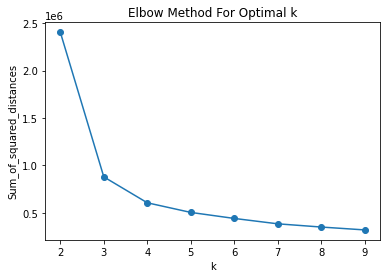

In [ ]:
#Full

trx_rfm = trx_per_cust_plus[['recency','frequency','monetary']]
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

Sum_of_squared_distances = []
dbi_score = []

# Use k from 2 to 15
K = range(2,10)
for k in K:
    # km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=500,  tol=1e-04, random_state=0)
    km = KMeans(n_clusters=k, init='k-means++')
    km = km.fit(trx_rfm)
    Sum_of_squared_distances.append(km.inertia_) # Get sum of square distances by applying km.inertia_ 
    labels = km.predict(trx_rfm)
    dbi_score.append(davies_bouldin_score(trx_rfm,labels))

# Plot Results
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

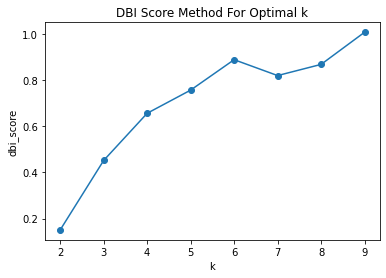

In [ ]:
plt.plot(K, dbi_score, marker='o')
plt.xlabel('k')
plt.ylabel('dbi_score')
plt.title('DBI Score Method For Optimal k')
plt.show()

In [ ]:
# Optimal Cluster = 3
km = KMeans(n_clusters=3, init='k-means++')
km = km.fit(trx_rfm)

In [ ]:
label = km.predict(trx_rfm)
df1 = trx_rfm.copy()
df1['Label'] = label

In [ ]:
# Showing cluster labels
df1['Label'] = [i+1 for i in label] #Avoiding cluster named 0
np.unique(df1['Label'])

array([1, 2, 3])

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df1, x="recency", y="frequency", z="monetary",
                    color = 'Label', size = 'Label')
fig.show()

In [ ]:
df1_1 = df1[df1['Label'] == 1]
df1_2 = df1[df1['Label'] == 2]
df1_3 = df1[df1['Label'] == 3]

In [ ]:
df1_1.describe()

,recency,frequency,monetary,Label
count,5307.000000,5307.000000,5307.000000,5307.0
mean,2.076503,28.908046,68.273582,1.0
std,1.170608,5.438952,8.369948,0.0
min,1.000000,10.000000,51.051282,1.0
25%,1.000000,25.000000,61.807072,1.0
50%,2.000000,29.000000,67.281250,1.0
75%,3.000000,32.000000,73.480510,1.0
max,11.000000,51.000000,108.923077,1.0


In [ ]:
df1_2.describe()

,recency,frequency,monetary,Label
count,306.000000,306.000000,306.000000,306.0
mean,2.254902,144.235294,213.338471,2.0
std,1.259869,12.180751,11.061720,0.0
min,1.000000,114.000000,183.985075,2.0
25%,1.000000,135.000000,205.603453,2.0
50%,2.000000,145.000000,213.017532,2.0
75%,3.000000,153.000000,220.968927,2.0
max,7.000000,177.000000,251.772414,2.0


In [ ]:
df1_3.describe()

,recency,frequency,monetary,Label
count,3238.000000,3238.000000,3238.000000,3238.0
mean,2.137739,20.788758,41.963410,3.0
std,1.200166,5.042100,7.326439,0.0
min,1.000000,5.000000,18.923077,3.0
25%,1.000000,17.000000,36.555556,3.0
50%,2.000000,20.000000,41.639319,3.0
75%,3.000000,24.000000,47.663043,3.0
max,12.000000,43.000000,58.333333,3.0


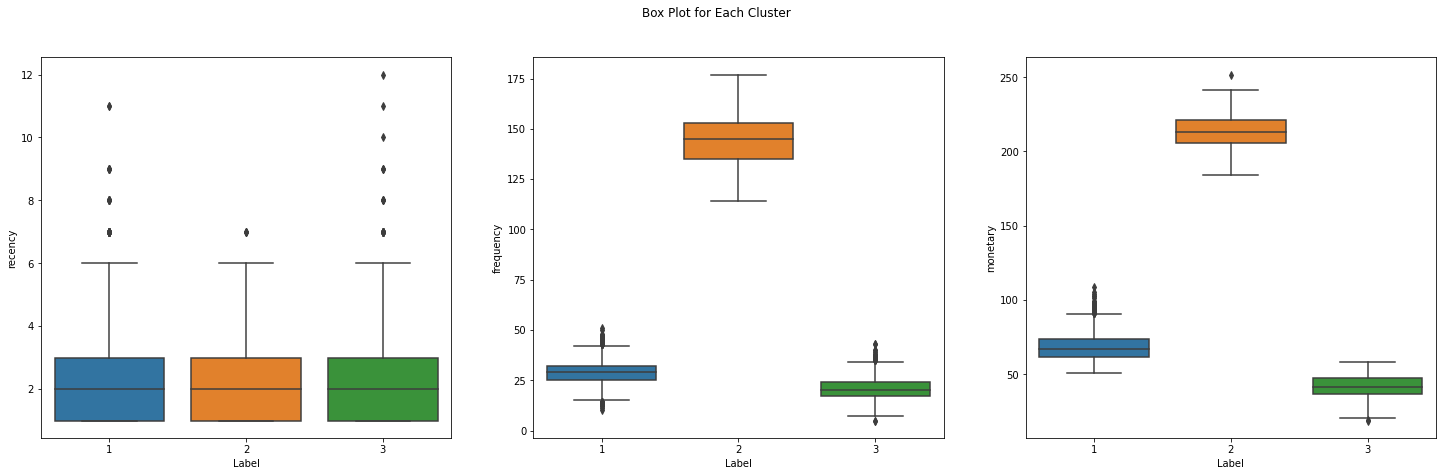

In [ ]:
fig, axes  = plt.subplots(1,3, figsize = (25,7))
fig.suptitle('Box Plot for Each Cluster')

sns.boxplot(
    x = 'Label',
    y = 'recency',
    data = df1,
    ax = axes[0]
)
sns.boxplot(
    x = 'Label',
    y = 'frequency',
    data = df1,
    ax = axes[1]
)

sns.boxplot(
    x = 'Label',
    y = 'monetary',
    data = df1,
    ax = axes[2]
)

plt.show()

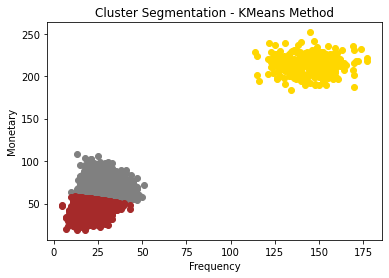

In [ ]:
#filter rows of original data
filtered_label1 = df1[df1['Label'] == 1]
filtered_label2 = df1[df1['Label'] == 2]
filtered_label3 = df1[df1['Label'] == 3]

clust_cent = km.cluster_centers_
 
#Plotting the results
plt.scatter(filtered_label1['frequency'] , filtered_label1['monetary'] , color = 'gray')
plt.scatter(filtered_label2['frequency'] , filtered_label2['monetary'] , color = 'gold')
plt.scatter(filtered_label3['frequency'] , filtered_label3['monetary'] , color = 'brown')

plt.title('Cluster Segmentation - KMeans Method')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

In [ ]:
labelcent

[2.137739345274861, 20.78875849289685, 41.96341031010964]

In [ ]:
#filter rows of original data
filtered_label1 = df1[df1['Label'] == 1].reset_index(drop = True)
filtered_label2 = df1[df1['Label'] == 2].reset_index(drop = True)
filtered_label3 = df1[df1['Label'] == 3].reset_index(drop = True)

label1cent = [filtered_label1['recency'].mean(), filtered_label1['frequency'].mean(),filtered_label1['monetary'].mean()]
label2cent = [filtered_label2['recency'].mean(), filtered_label2['frequency'].mean(),filtered_label2['monetary'].mean()]
label3cent = [filtered_label3['recency'].mean(), filtered_label3['frequency'].mean(),filtered_label3['monetary'].mean()]

label1wcss = 0
for i in range(len(filtered_label1)):
  label1wcss += (filtered_label1['recency'][i] - label1cent[0])**2
  label1wcss += (filtered_label1['frequency'][i] - label1cent[1])**2
  label1wcss += (filtered_label1['monetary'][i] - label1cent[2])**2

label2wcss = 0
for i in range(len(filtered_label2)):
  label2wcss += (filtered_label2['recency'][i] - label2cent[0])**2
  label2wcss += (filtered_label2['frequency'][i] - label2cent[1])**2
  label2wcss += (filtered_label2['monetary'][i] - label2cent[2])**2

label3wcss = 0
for i in range(len(filtered_label3)):
  label3wcss += (filtered_label3['recency'][i] - label3cent[0])**2
  label3wcss += (filtered_label3['frequency'][i] - label3cent[1])**2
  label3wcss += (filtered_label3['monetary'][i] - label3cent[2])**2

# Final WCSS
# Final WCSS
print(f'{round(label1wcss,3):,}')
print(f'{round(label2wcss,3):,}')
print(f'{round(label3wcss,3):,}')
print(f'{round(label1wcss + label2wcss +label3wcss,3):,}')

260,707.584
535,951.345
83,057.482
879,716.411


In [ ]:
km.inertia_

879718.7780859729

Satu satu

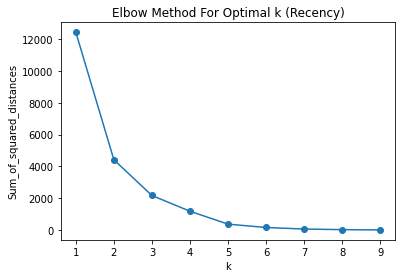

In [ ]:
# Recency
trx_rfm = trx_per_cust_plus[['recency']]

from sklearn.cluster import KMeans

Sum_of_squared_distances = []

# Use k from 1 to 15
K = range(1,10)
for k in K:
    # km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=500,  tol=1e-04, random_state=0)
    km = KMeans(n_clusters=k, init='k-means++')
    km = km.fit(trx_rfm)
    Sum_of_squared_distances.append(km.inertia_) # Get sum of square distances by applying km.inertia_ 

# Plot Results
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k (Recency)')
plt.show()

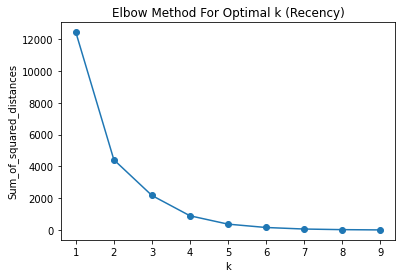

In [ ]:
# Recency
trx_rfm = trx_per_cust_plus[['recency']]

from sklearn.cluster import KMeans

Sum_of_squared_distances = []

# Use k from 1 to 15
K = range(1,10)
for k in K:
    # km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=500,  tol=1e-04, random_state=0)
    km = KMeans(n_clusters=k, init='k-means++')
    km = km.fit(trx_rfm)
    Sum_of_squared_distances.append(km.inertia_) # Get sum of square distances by applying km.inertia_ 

# Plot Results
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k (Recency)')
plt.show()

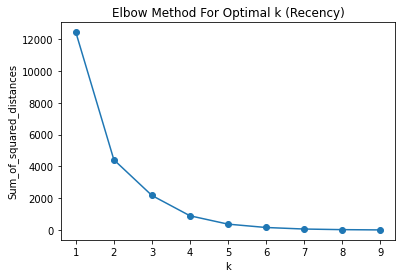

In [ ]:
# Recency
trx_rfm = trx_per_cust_plus[['recency']]

from sklearn.cluster import KMeans

Sum_of_squared_distances = []

# Use k from 1 to 15
K = range(1,10)
for k in K:
    # km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=500,  tol=1e-04, random_state=0)
    km = KMeans(n_clusters=k, init='k-means++')
    km = km.fit(trx_rfm)
    Sum_of_squared_distances.append(km.inertia_) # Get sum of square distances by applying km.inertia_ 

# Plot Results
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k (Recency)')
plt.show()

predict opc trial

In [ ]:
trial_clust = trial_full[['recency','frequency','monetary']]

In [ ]:
df2 = trial_clust.copy()
km = KMeans(n_clusters=3, init='k-means++')
km.fit(df2)
label = km.predict(df2)
df2['Label'] = label
# Showing cluster labels
df2['Label'] = [i+1 for i in label] #Avoiding cluster named 0
np.unique(df2['Label'])

array([1, 2, 3])

In [ ]:
km.inertia_

6066.0651665166915

In [ ]:
df2.head()

,recency,frequency,monetary,Label
0,1,28,46.464286,3
1,3,25,41.400000,3
2,3,21,33.285714,3
3,2,19,40.368421,3
4,4,18,30.777778,3


In [ ]:
filtered_label1

,index,recency,frequency,monetary,Label
0,16,2,21,59.380952,1
1,17,2,21,70.238095,1
2,18,1,29,79.482759,1
3,23,2,33,61.818182,1
4,24,1,27,60.333333,1
5,25,2,22,60.272727,1
6,26,1,25,68.640000,1
7,27,2,28,78.607143,1
8,28,5,29,68.275862,1
9,29,2,31,56.548387,1


In [ ]:
#filter rows of original data
filtered_label1 = df2[df2['Label'] == 1].reset_index(drop = True)
filtered_label2 = df2[df2['Label'] == 2].reset_index(drop = True)
filtered_label3 = df2[df2['Label'] == 3].reset_index(drop = True)

label1cent = [filtered_label1['recency'].mean(), filtered_label1['frequency'].mean(),filtered_label1['monetary'].mean()]
label2cent = [filtered_label2['recency'].mean(), filtered_label2['frequency'].mean(),filtered_label2['monetary'].mean()]
label3cent = [filtered_label3['recency'].mean(), filtered_label3['frequency'].mean(),filtered_label3['monetary'].mean()]

label1wcss = 0
for i in range(len(filtered_label1)):
  label1wcss += (filtered_label1['recency'][i] - label1cent[0])**2
  label1wcss += (filtered_label1['frequency'][i] - label1cent[1])**2
  label1wcss += (filtered_label1['monetary'][i] - label1cent[2])**2

label2wcss = 0
for i in range(len(filtered_label2)):
  label2wcss += (filtered_label2['recency'][i] - label2cent[0])**2
  label2wcss += (filtered_label2['frequency'][i] - label2cent[1])**2
  label2wcss += (filtered_label2['monetary'][i] - label2cent[2])**2

label3wcss = 0
for i in range(len(filtered_label3)):
  label3wcss += (filtered_label3['recency'][i] - label3cent[0])**2
  label3wcss += (filtered_label3['frequency'][i] - label3cent[1])**2
  label3wcss += (filtered_label3['monetary'][i] - label3cent[2])**2

# Final WCSS
print(label1wcss)
print(label2wcss)
print(label3wcss)
print(label1wcss + label2wcss +label3wcss)

4301.860629268231
568.2945176141013
1195.9100196343597
6066.0651665166915


# EDA General - trx_full

In [ ]:
trx_full

,trx_id,trx_date,cust_id,trx_region,purchase,jam,hari,bulan,tahun,tanggal,total_price,item_id_1,item_id_2,item_id_3,item_id_4,item_id_5,item_id_6,item_id_7,item_id_8,item_id_9,item_id_10,item_id_11,item_id_12,item_id_13,item_id_14,item_id_15,item_id_16,item_id_17,item_id_18,item_id_19,item_id_20,item_id_21,item_id_22,item_id_23,item_id_24,item_id_25,item_id_26,item_id_27,item_id_28,item_id_29,item_id_30,Eggs,Dairy Products,Breads,Fruits and Vegetables,Sugar and Spices,Cooking Oils,Joe's Farm,Vegetarian Choice,Auckland's Best,Pure Green,Healthree
0,1,2018-02-04 03:31:48,1.793746e+11,Wellington,"[{'id': 8, 'qty': 3}]",3,Minggu,2,2018,4,48,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,3,0,0,0
1,2,2018-10-20 04:34:51,8.916823e+11,Hamilton,"[{'id': 7, 'qty': 1}, {'id': 1, 'qty': 1}, {'i...",4,Sabtu,10,2018,20,38,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,1,1,1,0,0
2,3,2018-09-26 01:52:14,1.334625e+11,Auckland,"[{'id': 8, 'qty': 1}]",1,Rabu,9,2018,26,16,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,4,2018-07-03 21:24:51,3.652541e+11,Tauranga,"[{'id': 13, 'qty': 3}]",21,Selasa,7,2018,3,42,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,3,0,0
4,5,2018-12-01 08:35:19,8.611679e+11,Auckland,"[{'id': 15, 'qty': 2}, {'id': 15, 'qty': 2}]",8,Sabtu,12,2018,1,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264860,99155,2020-09-08 00:00:00,9.698659e+11,Hamilton,"[{'id': 13, 'qty': 5}]",0,Selasa,9,2020,8,70,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,5,0,0
264861,99156,2020-06-21 00:00:00,5.921282e+11,Wellington,"[{'id': 3, 'qty': 1}, {'id': 14, 'qty': 2}]",0,Minggu,6,2020,21,40,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,0,2,0,0
264862,99157,2020-03-23 00:00:00,8.688884e+11,Hamilton,"[{'id': 18, 'qty': 1}]",0,Senin,3,2020,23,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
264863,99158,2020-10-24 00:00:00,2.830201e+11,Auckland,"[{'id': 7, 'qty': 1}, {'id': 21, 'qty': 4}, {'...",0,Sabtu,10,2020,24,196,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,8,0,6,0,0,0,0,3,5,6,0


In [ ]:
trx_full['trx_date'].min()

Timestamp('2018-01-01 00:11:10')

In [ ]:
trx_full['trx_date'].max()

Timestamp('2020-12-30 00:00:00')

In [ ]:
trx_full.describe()

,trx_id,cust_id,jam,bulan,tahun,tanggal,total_price,item_id_1,item_id_2,item_id_3,item_id_4,item_id_5,item_id_6,item_id_7,item_id_8,item_id_9,item_id_10,item_id_11,item_id_12,item_id_13,item_id_14,item_id_15,item_id_16,item_id_17,item_id_18,item_id_19,item_id_20,item_id_21,item_id_22,item_id_23,item_id_24,item_id_25,item_id_26,item_id_27,item_id_28,item_id_29,item_id_30,Eggs,Dairy Products,Breads,Fruits and Vegetables,Sugar and Spices,Cooking Oils,Joe's Farm,Vegetarian Choice,Auckland's Best,Pure Green,Healthree
count,264865.000000,2.648650e+05,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000,264865.000000
mean,47165.303536,5.090913e+11,7.310169,6.499285,2019.054503,15.703075,85.761241,0.158081,0.159953,0.091571,0.080033,0.080701,0.078398,0.226768,0.226455,0.226534,0.140842,0.135499,0.130214,0.520227,0.511578,0.514541,0.260733,0.261718,0.265562,0.188168,0.182081,0.185706,0.096796,0.090333,0.089159,0.245185,0.249822,0.250195,0.135197,0.132282,0.132154,1.461137,1.451872,1.388194,0.747056,0.731928,0.726717,0.668401,1.129991,2.527533,0.870681,1.310298
std,27330.670958,2.895427e+11,7.812112,3.445517,0.818172,8.779481,89.908131,0.689418,0.694667,0.551233,0.498629,0.502696,0.496496,0.837864,0.835487,0.837823,0.666697,0.660713,0.643646,1.308248,1.297664,1.302324,0.950193,0.952338,0.965827,0.919142,0.902024,0.913087,0.669597,0.641239,0.635225,1.116521,1.131836,1.134434,0.839199,0.832796,0.832553,2.515132,2.506905,2.508798,1.755852,1.732773,1.735413,1.473943,1.928435,3.075925,2.275483,3.782619
min,1.000000,2.579917e+08,0.000000,1.000000,2018.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23518.000000,2.559305e+11,0.000000,4.000000,2018.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47080.000000,5.125194e+11,5.000000,7.000000,2019.000000,16.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,70644.000000,7.592313e+11,14.000000,9.000000,2020.000000,23.000000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000
max,99159.000000,9.999876e+11,23.000000,12.000000,2020.000000,31.000000,1049.000000,10.000000,12.000000,10.000000,11.00

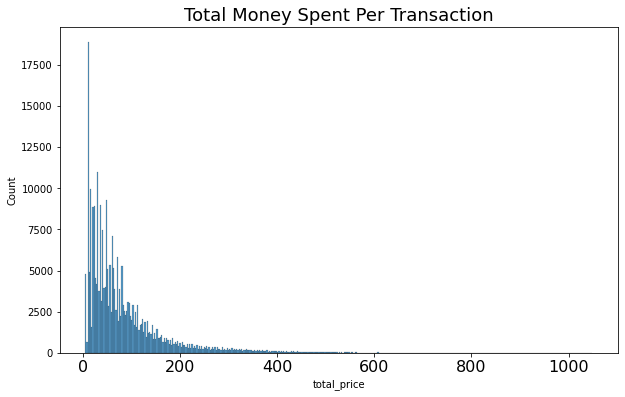

In [ ]:
# Histogram
plt.figure(figsize = (10,6))
p = sns.histplot(
    trx_full['total_price']
)

plt.title(f'Total Money Spent Per Transaction',fontsize = 18)
plt.xticks(fontsize=16, rotation=0)

plt.show()

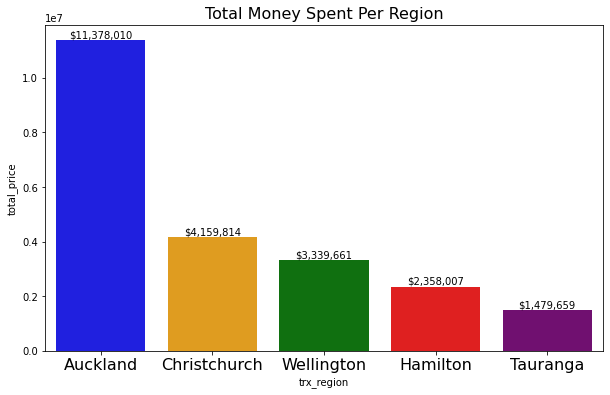

In [ ]:
# Region check
df = trx_full.groupby('trx_region').agg('sum').sort_values(by = 'total_price',ascending = False).reset_index()

plt.figure(figsize = (10,6))
p = sns.barplot(
    x = 'trx_region',
    y = 'total_price',
    data = df,
    palette = ['blue','orange','green','red','purple']
)

p.bar_label(p.containers[0],labels = [f'${x:,}' for x in df['total_price']])
plt.xticks(fontsize=16, rotation=0)
plt.title('Total Money Spent Per Region',fontsize=16)
plt.show()

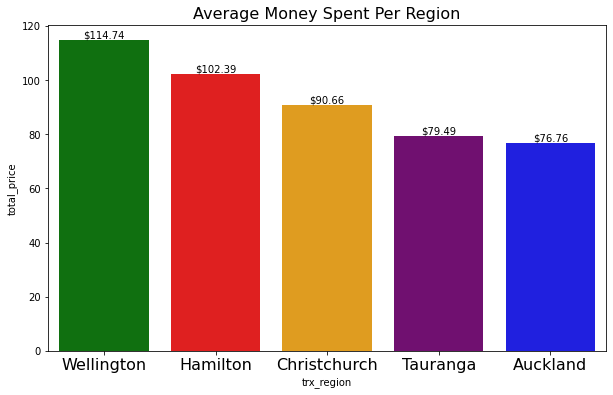

In [ ]:
# Region check
df = trx_full.groupby('trx_region').agg('mean').sort_values(by = 'total_price',ascending = False).reset_index()

plt.figure(figsize = (10,6))
p = sns.barplot(
    x = 'trx_region',
    y = 'total_price',
    data = df,
    palette = ['green','red','orange','purple','blue']
)

p.bar_label(p.containers[0],labels = [f'${round(x,2)}' for x in df['total_price']])
plt.xticks(fontsize=16, rotation=0)
plt.title('Average Money Spent Per Region', fontsize=16)
plt.show()

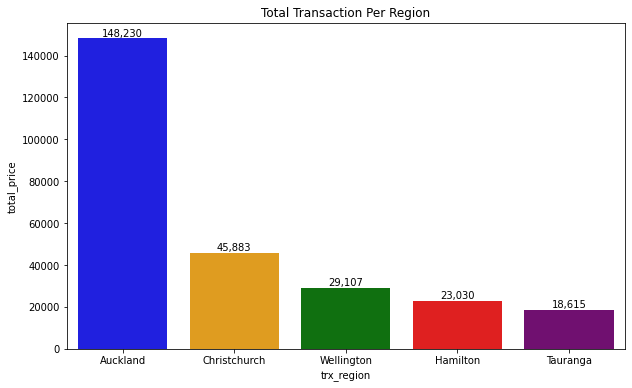

In [ ]:
# Region check
df = trx_full.groupby('trx_region').agg('count').sort_values(by = 'total_price',ascending = False).reset_index()

plt.figure(figsize = (10,6))
p = sns.barplot(
    x = 'trx_region',
    y = 'total_price',
    data = df,
    palette = ['blue','orange','green','red','purple']
)


p.bar_label(p.containers[0],labels = [f'{x:,}' for x in df['total_price']])
plt.title('Total Transaction Per Region')
plt.show()

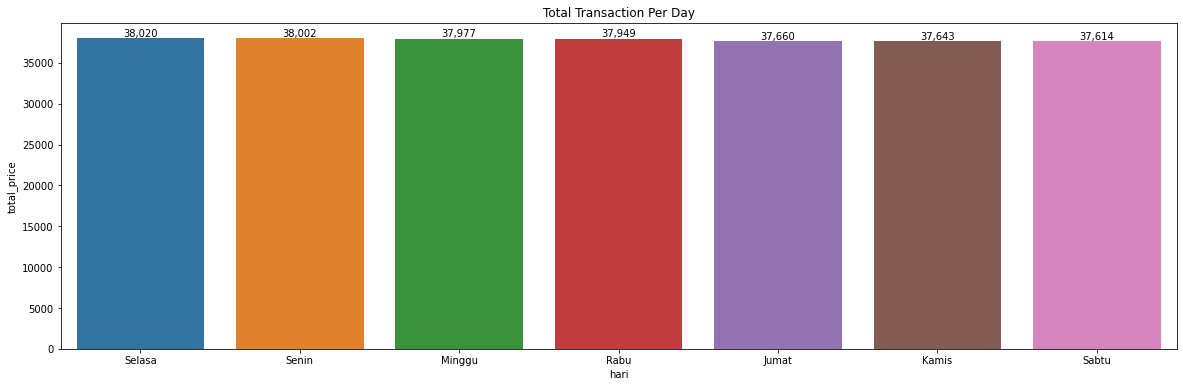

In [ ]:
# Day check
df = trx_full.groupby('hari').agg('count').sort_values(by = 'total_price',ascending = False).reset_index()

plt.figure(figsize = (20,6))
p = sns.barplot(
    x = 'hari',
    y = 'total_price',
    data = df
)

p.bar_label(p.containers[0],labels = [f'{x:,}' for x in df['total_price']])
plt.title('Total Transaction Per Day')
plt.show()

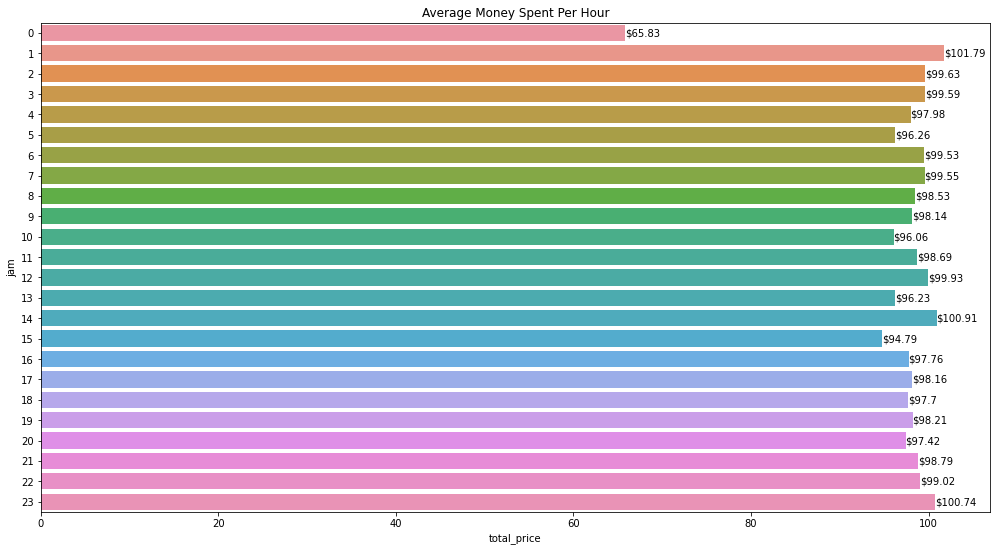

In [ ]:
# Hour check
df = trx_full.groupby('jam').agg('mean').sort_values(by = 'jam',ascending = True).reset_index()
df['jam'] = df['jam'].astype(str)

plt.figure(figsize = (17,9))
p = sns.barplot(
    y = 'jam',
    x = 'total_price',
    data = df
)

p.bar_label(p.containers[0],labels = [f'${round(x,2)}' for x in df['total_price']])
plt.title('Average Money Spent Per Hour')
plt.show()

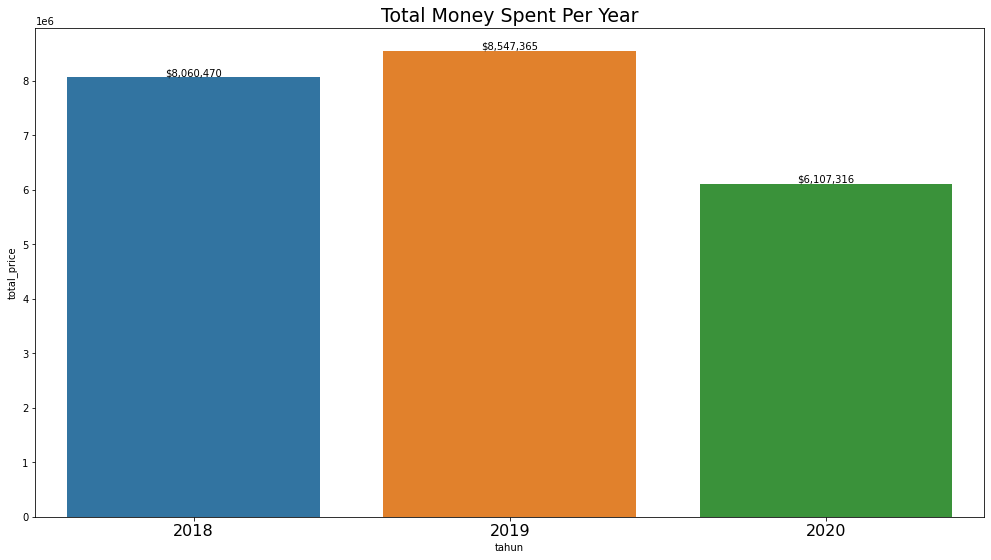

In [ ]:
# Yearly check
df = trx_full.groupby('tahun').agg('sum').sort_values(by = 'tahun',ascending = True).reset_index()
df['tahun'] = df['tahun'].astype(str)

plt.figure(figsize = (17,9))
p = sns.barplot(
    x = 'tahun',
    y = 'total_price',
    data = df
)

p.bar_label(p.containers[0],labels = [f'${x:,}' for x in df['total_price']])
plt.xticks(fontsize=16, rotation=0)
plt.title('Total Money Spent Per Year', fontsize = 19)
plt.show()

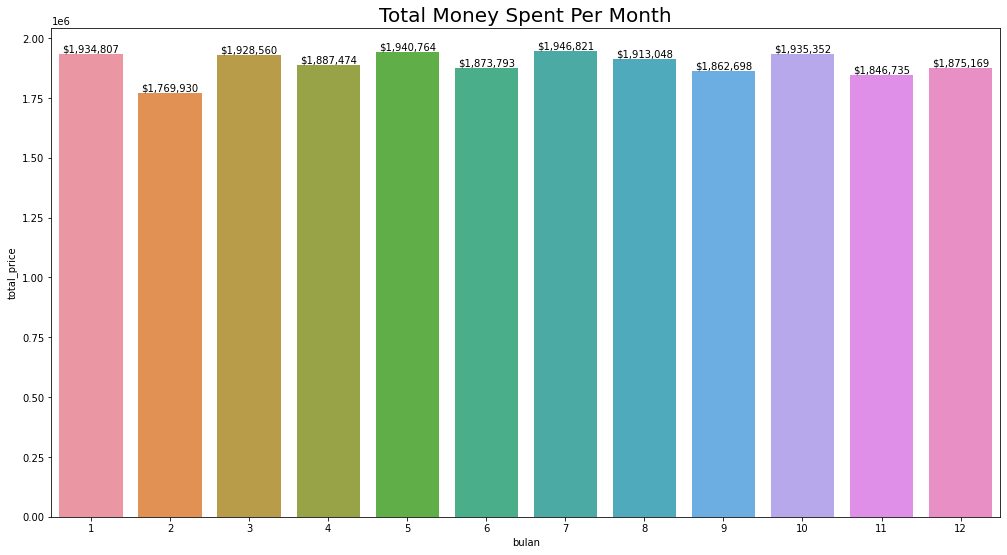

In [ ]:
# MOnthly check
df = trx_full.groupby('bulan').agg('sum').sort_values(by = 'bulan',ascending = True).reset_index()
df['bulan'] = df['bulan'].astype(str)

plt.figure(figsize = (17,9))
p = sns.barplot(
    x = 'bulan',
    y = 'total_price',
    data = df
)

p.bar_label(p.containers[0],labels = [f'${x:,}' for x in df['total_price']])
plt.title('Total Money Spent Per Month',fontsize = 20)
plt.show()

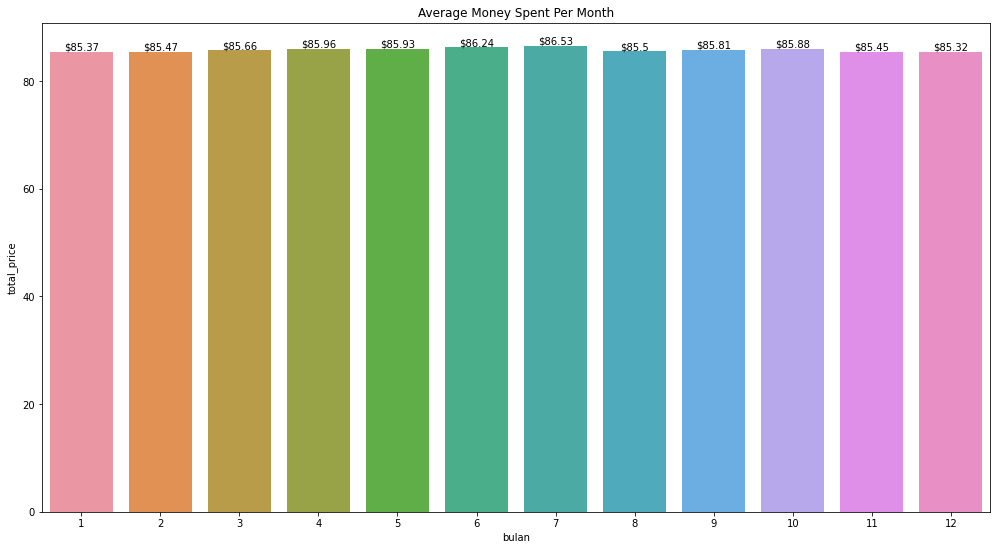

In [ ]:
# MOnthly check
df = trx_full.groupby('bulan').agg('mean').sort_values(by = 'bulan',ascending = True).reset_index()
df['bulan'] = df['bulan'].astype(str)

plt.figure(figsize = (17,9))
p = sns.barplot(
    x = 'bulan',
    y = 'total_price',
    data = df
)

p.bar_label(p.containers[0],labels = [f'${round(x,2)}' for x in df['total_price']])
plt.title('Average Money Spent Per Month')
plt.show()

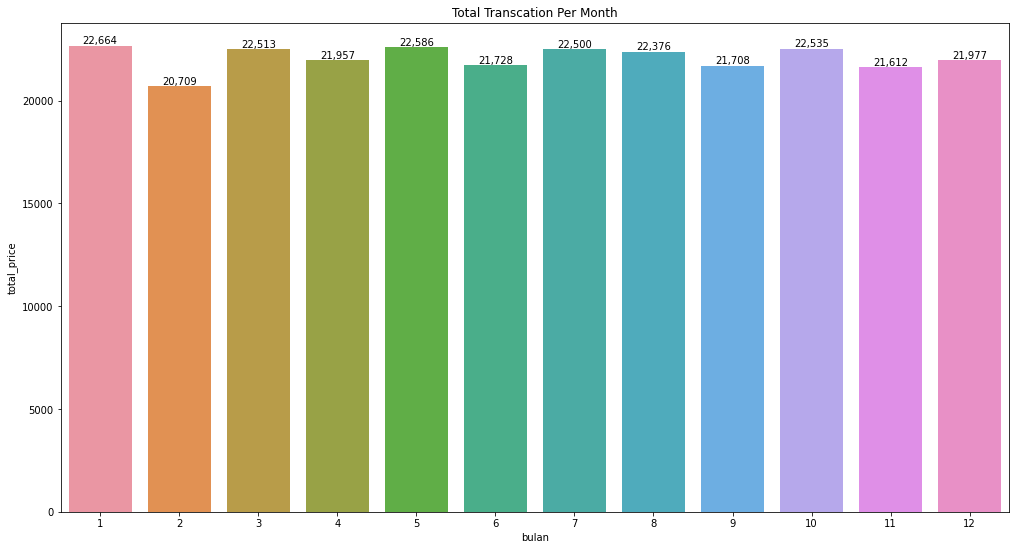

In [ ]:
# MOnthly check
df = trx_full.groupby('bulan').agg('count').sort_values(by = 'bulan',ascending = True).reset_index()
df['bulan'] = df['bulan'].astype(str)

plt.figure(figsize = (17,9))
p = sns.barplot(
    x = 'bulan',
    y = 'total_price',
    data = df
)

p.bar_label(p.containers[0],labels = [f'{x:,}' for x in df['total_price']])
plt.title('Total Transcation Per Month')
plt.show()

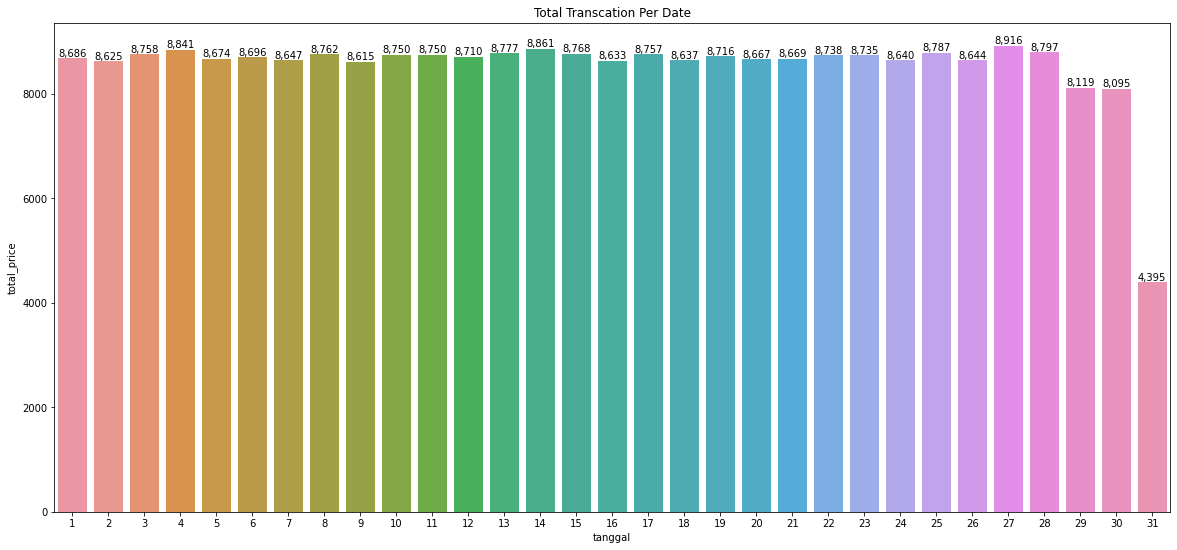

In [ ]:
# Date check
df = trx_full.groupby('tanggal').agg('count').sort_values(by = 'tanggal',ascending = True).reset_index()
df['tanggal'] = df['tanggal'].astype(str)

plt.figure(figsize = (20,9))
p = sns.barplot(
    x = 'tanggal',
    y = 'total_price',
    data = df
)

p.bar_label(p.containers[0],labels = [f'{x:,}' for x in df['total_price']])
plt.title('Total Transcation Per Date')
plt.show()

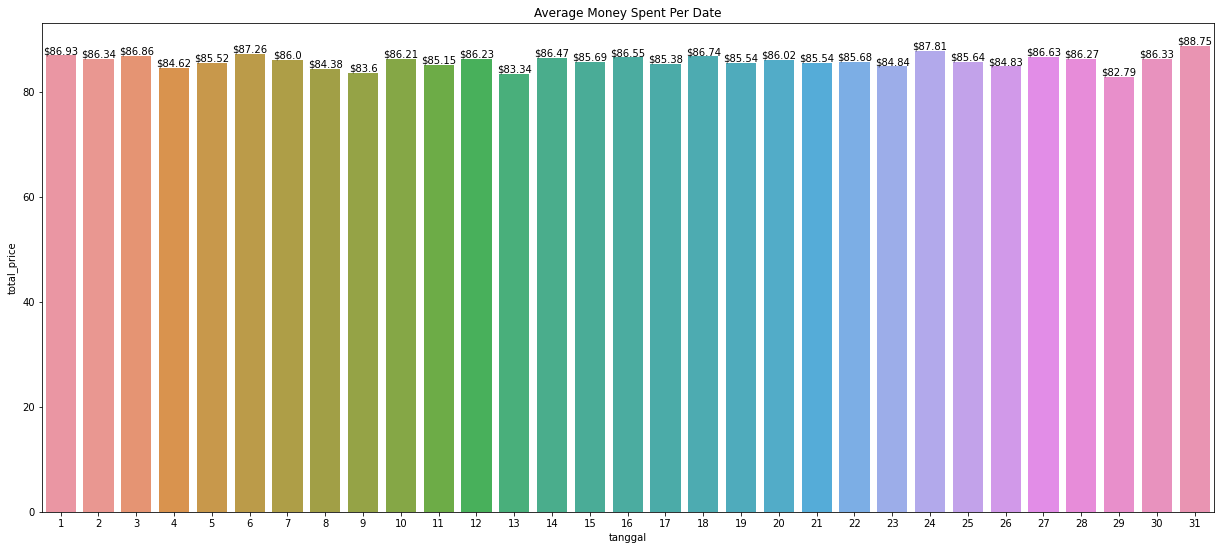

In [ ]:
# MOnthly check
df = trx_full.groupby('tanggal').agg('mean').sort_values(by = 'tanggal',ascending = True).reset_index()
df['tanggal'] = df['tanggal'].astype(str)

plt.figure(figsize = (21,9))
p = sns.barplot(
    x = 'tanggal',
    y = 'total_price',
    data = df
)

p.bar_label(p.containers[0],labels = [f'${round(x,2)}' for x in df['total_price']])
plt.title('Average Money Spent Per Date')
plt.show()

# EDA General - CS Mast

In [ ]:
cs_mast = cs_mast.dropna()

In [ ]:
cs_mast

,customer_id,customer_name,customer_gender,customer_email,customer_region,customer_age,customer_occupation
0,1.526945e+10,Milton Claire,M,mclaire1tg@fastcompany.com,Auckland,35.0,Pharmacist
1,1.790783e+10,Cecil Standeven,F,cstandeven2jm@discuz.net,Wellington,54.0,Business Systems Development Analyst
3,4.161700e+10,Beilul Berrick,F,bberrick5tv@g.co,Auckland,46.0,Engineer I
5,5.233480e+10,Bertrando McAndie,M,bmcandie1jq@wikispaces.com,Wellington,42.0,Mechanical Systems Engineer
6,2.387960e+11,Jyoti McCusker,F,jmccusker3s3@paginegialle.it,Auckland,52.0,Office Assistant I
...,...,...,...,...,...,...,...
8860,7.124449e+10,Drake Hellin,M,dhellin2be@mashable.com,Wellington,63.0,Financial Advisor
8861,4.790380e+11,Harlie Hucke,F,hhucke6c3@marriott.com,Christchurch,22.0,Information Systems Manager
8862,9.064210e+11,Cherey Bradford,F,cbradford7f9@arstechnica.com,Auckland,34.0,Systems Administrator III
8863,8.777610e+11,Brennan Epple,M,bepple3xz@nyu.edu,Wellington,56.0,Project Manager


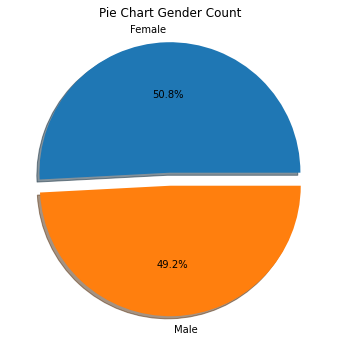

In [ ]:
# Plot Pie Chart 
df_gender = cs_mast.groupby(['customer_gender']).agg(len).reset_index()

plt.figure(figsize = (6,6))
plt.pie(
    x = df_gender['customer_id'],
    labels = ['Female','Male'],
    autopct='%1.1f%%',
    shadow=True,
    explode = (0.1,0)
)
plt.title('Pie Chart Gender Count')
plt.show()

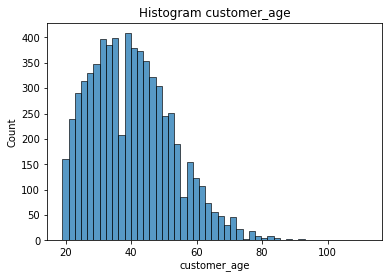

In [ ]:
# Histogram Age
p = sns.histplot(
    x = 'customer_age',
    data = cs_mast
)
plt.title('Histogram customer_age')
plt.show()

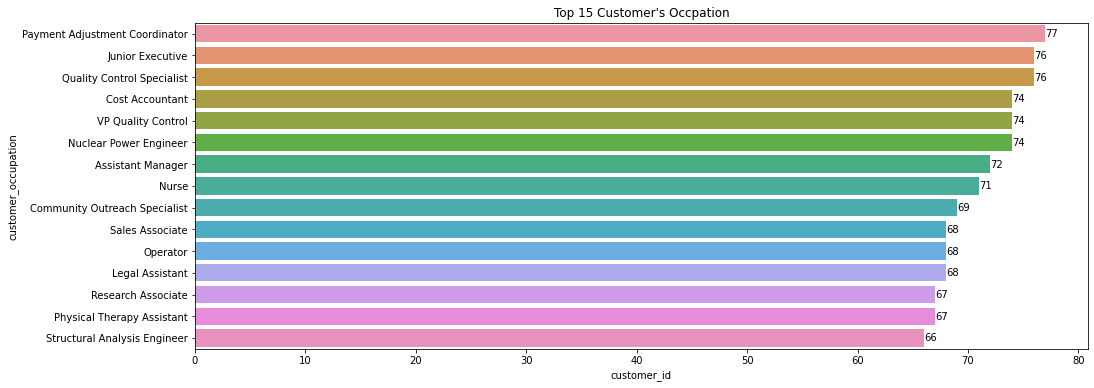

In [ ]:
# Plot Pie Chart 
df_oc = cs_mast.groupby(['customer_occupation']).agg(len).sort_values(by = 'customer_id', ascending = False).reset_index()

plt.figure(figsize = (16,6))
p = sns.barplot(
    y = 'customer_occupation',
    x = 'customer_id',
    data = df_oc[:15]
)
p.bar_label(p.containers[0])
plt.title("Top 15 Customer's Occpation")
plt.show()

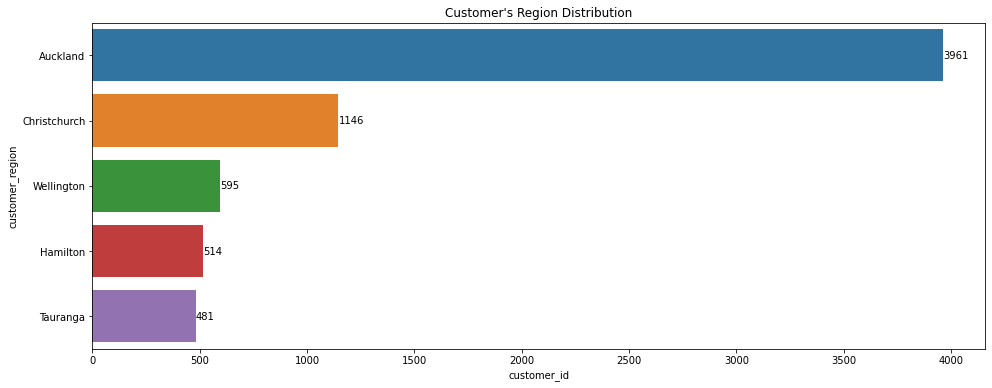

In [ ]:
# Plot Pie Chart 
df_oc = cs_mast.groupby(['customer_region']).agg(len).sort_values(by = 'customer_id', ascending = False).reset_index()

plt.figure(figsize = (16,6))
p = sns.barplot(
    y = 'customer_region',
    x = 'customer_id',
    data = df_oc
)
p.bar_label(p.containers[0])
plt.title("Customer's Region Distribution")
plt.show()

# EDA General trx_per_cust_plus

In [ ]:
trx_per_cust_plus

,cust_id,frequency,monetary,monetary_sum,recency,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15,item16,item17,item18,item19,item20,item21,item22,item23,item24,item25,item26,item27,item28,item29,item30,egg,dairy,breads,fruit_veg,sugar_spices,cook_oil,joe_farn,veg_choice,auckland,pure_green,healthree,customer_id,customer_name,customer_gender,customer_email,customer_region,customer_age,customer_occupation
0,2.579917e+08,21,40.000000,840,2,16,11,0,5,12,1,2,2,1,5,1,0,9,4,4,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,28,18,5,12,13,4,47,11,20,0,2,257991748.0,Minetta Pau,F,mpau1yc@ezinearticles.com,Auckland,29.0,VP Product Management
1,2.728059e+08,26,64.538462,1678,2,3,0,9,0,5,5,8,5,14,3,0,0,12,13,24,21,10,1,0,2,4,4,2,0,0,0,0,0,0,0,23,21,51,28,17,6,22,31,81,12,0,272805864.0,Dionisio Brindle,M,dbrindle2cs@imdb.com,Auckland,51.0,Geologist I
2,4.525937e+08,28,38.964286,1091,2,10,12,3,0,8,7,1,8,1,0,4,5,6,7,2,9,14,1,2,0,0,0,0,0,0,0,1,0,0,1,19,27,7,9,28,14,40,19,41,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.778588e+08,27,73.333333,1980,1,8,4,2,4,0,3,2,10,12,11,4,4,12,24,9,2,7,11,4,1,0,0,0,3,0,0,0,0,0,2,27,53,24,17,11,25,21,53,73,8,2,477858761.0,Aura Bleasdille,F,ableasdille7g2@tmall.com,Christchurch,52.0,Biostatistician III
4,5.714988e+08,17,56.941176,968,2,6,14,0,2,3,9,8,8,8,4,0,4,6,2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,24,17,6,3,13,34,32,17,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8846,9.992319e+11,31,77.258065,2395,1,0,2,2,6,0,0,8,11,9,2,5,0,16,32,15,24,10,7,3,11,7,5,0,5,0,0,1,0,0,0,27,60,35,37,15,12,10,35,109,31,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8847,9.993219e+11,23,33.521739,771,2,8,8,0,6,0,3,7,3,6,4,9,1,6,0,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,21,13,15,11,10,4,27,34,13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8848,9.994246e+11,16,40.500000,648,1,5,10,3,0,0,6,7,0,3,2,1,0,8,0,4,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,23,10,10,4,1,9,25,17,14,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8849,9.995026e+11,23,34.913043,803,1,2,8,0,1,1,18,4,5,8,1,1,3,0,0,1,5,3,7,0,0,0,0,0,0,1,0,0,0,0,0,7,13,9,9,5,28,30,22,18,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
trx_per_cust_plus.to_excel('full8000data.xlsx', index = False)

In [ ]:
trx_per_cust_plus.isna().sum()

In [ ]:
trx_per_cust_plus.shape

(8851, 53)

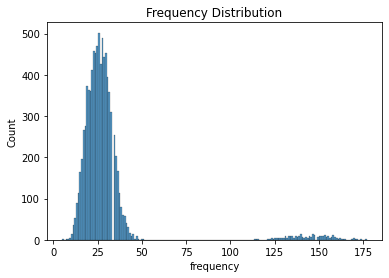

In [ ]:
p = sns.histplot(
    trx_per_cust_plus['frequency']
)
plt.title('Frequency Distribution')
plt.show()

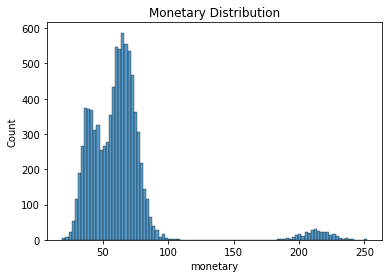

In [ ]:

p = sns.histplot(
    trx_per_cust_plus['monetary']
)
plt.title('Monetary Distribution')
plt.show()

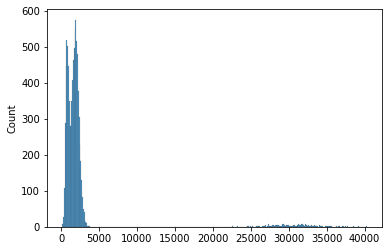

In [ ]:
p = sns.histplot(
    [x for x in trx_per_cust_plus['monetary_sum']]
)

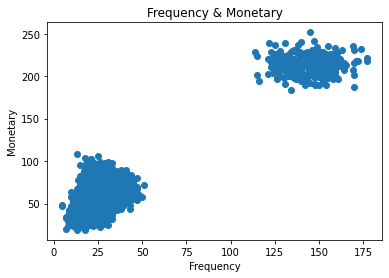

In [ ]:
#Plotting the results
plt.scatter(trx_per_cust_plus['frequency'] , trx_per_cust_plus['monetary'] )

plt.title('Frequency & Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

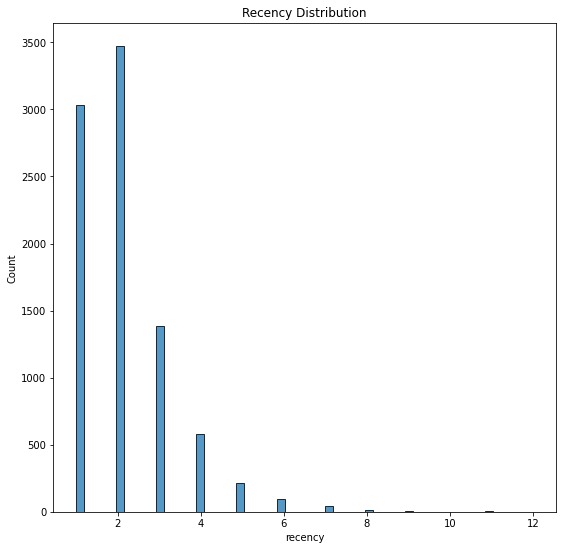

In [ ]:
plt.figure(figsize = (9,9))
p = sns.histplot(
    trx_per_cust_plus['recency']
)
plt.title('Recency Distribution')
plt.show()

In [ ]:
df_summary = pd.DataFrame({
    'item' : trx_per_cust_plus.columns.tolist()[5:46],
    'sum' : [trx_per_cust_plus[f'{x}'].sum() for x in trx_per_cust_plus.columns.tolist()[5:46]],
    'mean' :[trx_per_cust_plus[f'{x}'].mean() for x in trx_per_cust_plus.columns.tolist()[5:46]],
    'median' :[trx_per_cust_plus[f'{x}'].median() for x in trx_per_cust_plus.columns.tolist()[5:46]],
    'min' :[trx_per_cust_plus[f'{x}'].min() for x in trx_per_cust_plus.columns.tolist()[5:46]],
    'max' :[trx_per_cust_plus[f'{x}'].max() for x in trx_per_cust_plus.columns.tolist()[5:46]],
})

# df_summary

In [ ]:
df_summary['item'][:30] = [f"{get_product(i+1)['category']} - {get_product(i+1)['brand']}" for i in range(30)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



AttributeError: ignored

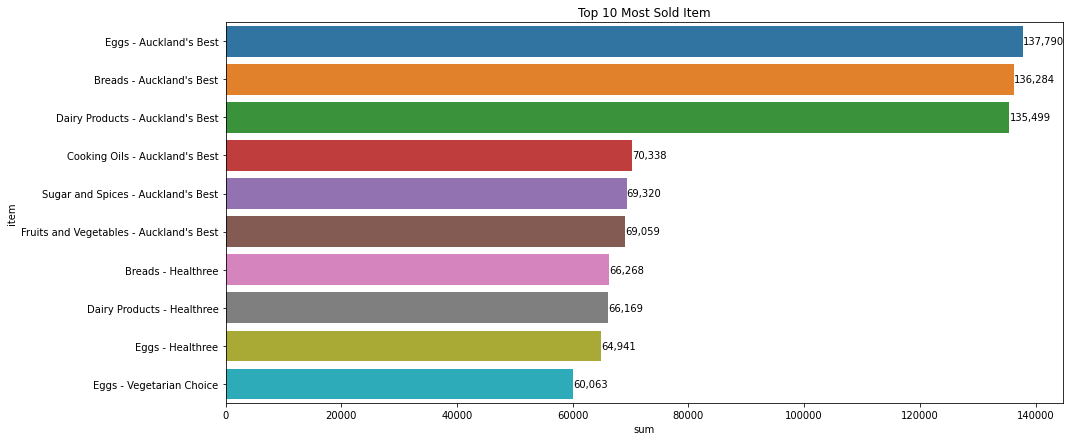

In [ ]:
# Plot Pie Chart 
df = df_summary[:30]
df_oc = df.sort_values(by = 'sum', ascending = False).reset_index()

plt.figure(figsize = (15,7))
p = sns.barplot(
    y = 'item',
    x = 'sum',
    data = df_oc[:10]
)
plt.title("Top 10 Most Sold Item")
p.bar_label(p.containers[0], labels = [f'{x:,}' for x in df_oc['sum']])
plt.show()

AttributeError: ignored

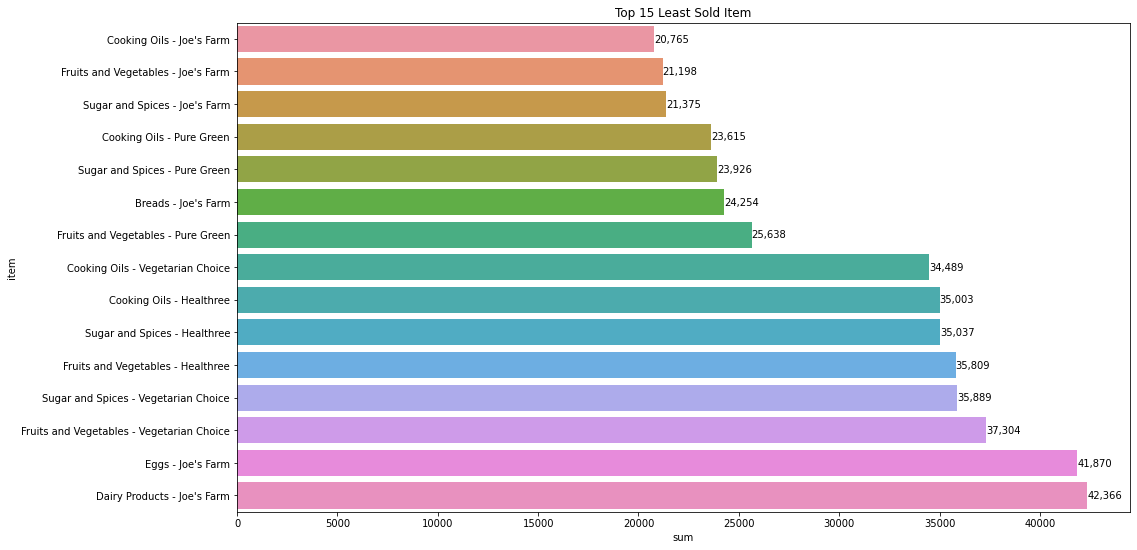

In [ ]:
# Plot Pie Chart 
df = df_summary[:30]
df_oc = df.sort_values(by = 'sum', ascending = True).reset_index()

plt.figure(figsize = (16,9))
p = sns.barplot(
    y = 'item',
    x = 'sum',
    data = df_oc[:15]
)
plt.title("Top 15 Least Sold Item")
p.bar_label(p.containers[0], labels = [f'{x:,}' for x in df_oc['sum']])
plt.show()

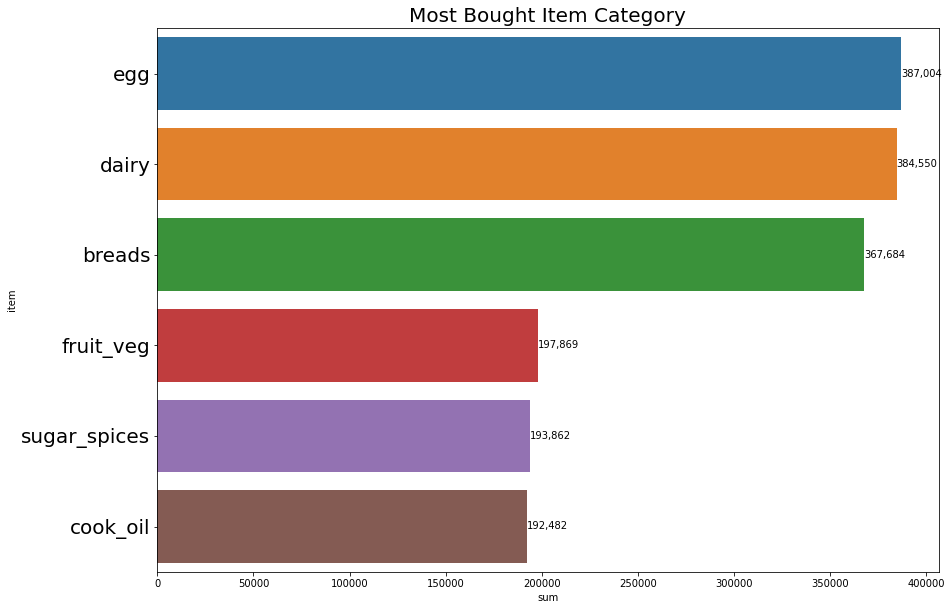

In [ ]:
# Plot Pie Chart 
df = df_summary[30:36]
df_oc = df.sort_values(by = 'sum', ascending = False).reset_index()

plt.figure(figsize = (14,10))
p = sns.barplot(
    y = 'item',
    x = 'sum',
    data = df_oc[:15]
)
p.bar_label(p.containers[0], labels = [f'{x:,}' for x in df_oc['sum']])
plt.yticks(fontsize=20, rotation=0)
plt.title("Most Bought Item Category",fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


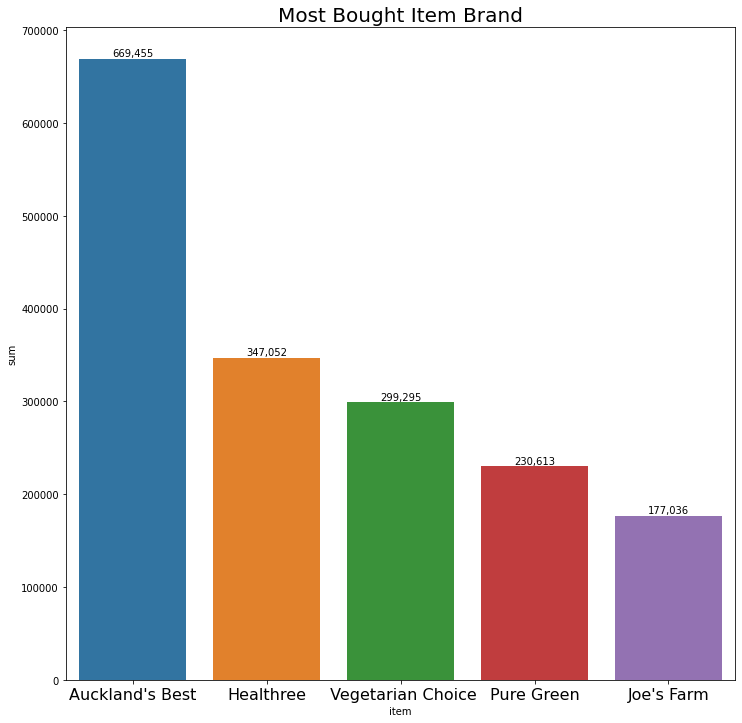

In [ ]:
# Plot Pie Chart 
df = df_summary[36:]
df['item'] = ["Joe's Farm", " Vegetarian Choice", "Auckland's Best", "Pure Green", "Healthree"]
df_oc = df.sort_values(by = 'sum', ascending = False).reset_index()

plt.figure(figsize = (12,12))
p = sns.barplot(
    x = 'item',
    y = 'sum',
    data = df_oc[:15]
)
p.bar_label(p.containers[0], labels = [f'{x:,}' for x in df_oc['sum']])
plt.xticks(fontsize=16, rotation=0)
plt.title("Most Bought Item Brand",fontsize  =20)
plt.show()

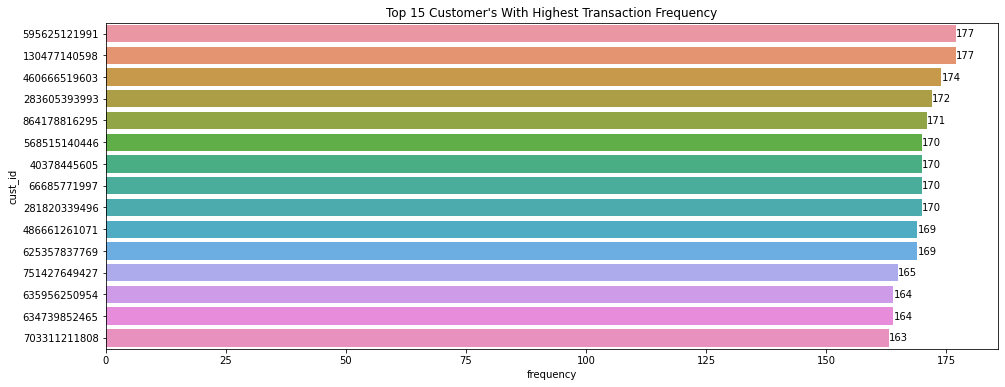

In [ ]:
# Plot Pie Chart 
df_oc = trx_per_cust_plus.sort_values(by = 'frequency', ascending = False).reset_index()
df_oc['cust_id'] = (df_oc['cust_id'].astype(int)).astype(str)

plt.figure(figsize = (16,6))
p = sns.barplot(
    x = 'frequency',
    y = 'cust_id',
    data = df_oc[:15]
)
p.bar_label(p.containers[0])
plt.title("Top 15 Customer's With Highest Transaction Frequency")
plt.show()

AttributeError: ignored

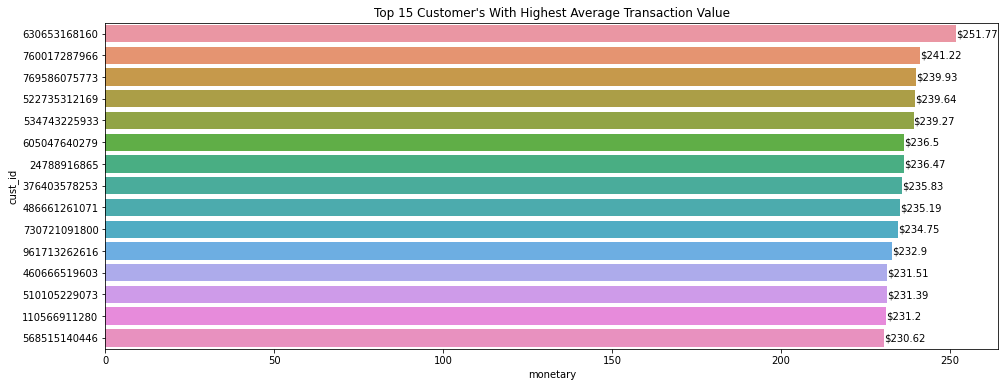

In [ ]:
# Plot Pie Chart 
df_oc = trx_per_cust_plus.sort_values(by = 'monetary', ascending = False).reset_index()
df_oc['cust_id'] = (df_oc['cust_id'].astype(int)).astype(str)

plt.figure(figsize = (16,6))
p = sns.barplot(
    x = 'monetary',
    y = 'cust_id',
    data = df_oc[:15]
)
plt.title("Top 15 Customer's With Highest Average Transaction Value")

p.bar_label(p.containers[0], labels = [f'${round(x,2)}' for x in df_oc['monetary']])
plt.show()

AttributeError: ignored

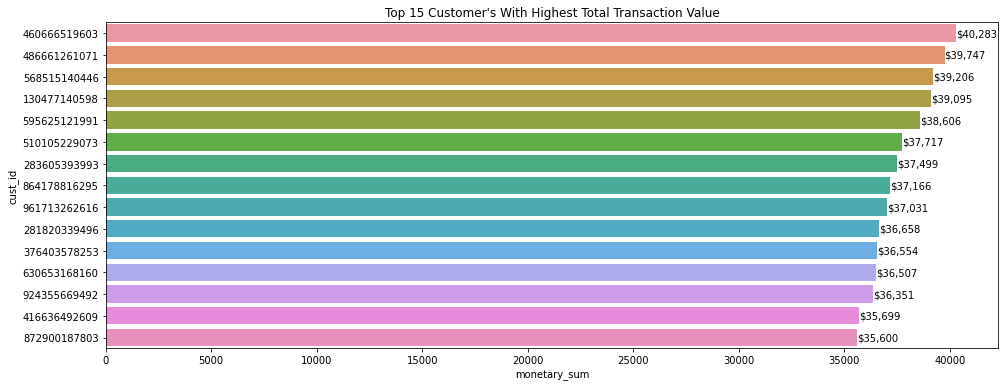

In [ ]:
# Plot Pie Chart 
df_oc = trx_per_cust_plus.sort_values(by = 'monetary_sum', ascending = False).reset_index()
df_oc['cust_id'] = (df_oc['cust_id'].astype(int)).astype(str)

plt.figure(figsize = (16,6))
p = sns.barplot(
    x = 'monetary_sum',
    y = 'cust_id',
    data = df_oc[:15]
)
plt.title("Top 15 Customer's With Highest Total Transaction Value")

p.bar_label(p.containers[0], labels = [f'${x:,}' for x in df_oc['monetary_sum']])
plt.show()

# EDA 50 Sample

In [ ]:
trial_full['memberresult'] = trial['membership_class_trial'] + " " + trial['result'] 

In [ ]:
trial_full.head(3)

,customer_id_x,membership_class_trial,result,frequency,monetary,monetary_sum,recency,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15,item16,item17,item18,item19,item20,item21,item22,item23,item24,item25,item26,item27,item28,item29,item30,egg,dairy,breads,fruit_veg,sugar_spices,cook_oil,joe_farn,veg_choice,auckland,pure_green,healthree,customer_id_y,customer_name,customer_gender,customer_email,customer_region,customer_age,customer_occupation,member-result,memberresult
0,997579682270,Silver,Unsatisfactory,28,46.464286,1301,1,17,3,0,0,4,3,15,13,7,7,3,6,6,1,10,0,2,6,0,1,0,0,0,0,0,0,0,0,0,0,40,22,17,9,9,15,29,57,25,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Unsatisfactory,Silver Unsatisfactory
1,997458045673,Silver,Unsatisfactory,25,41.400000,1035,3,0,13,3,1,9,1,14,1,3,4,4,0,8,10,7,7,0,3,0,0,2,0,0,0,0,0,0,0,0,0,22,24,16,12,13,4,27,27,35,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Unsatisfactory,Silver Unsatisfactory
2,996882350315,Silver,Unsatisfactory,21,33.285714,699,3,9,7,0,6,3,0,3,0,5,1,8,2,1,6,1,8,0,3,0,0,0,0,0,0,0,0,0,0,0,0,13,13,7,18,11,5,25,20,22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Unsatisfactory,Silver Unsatisfactory


In [ ]:
df

,tahun,trx_id,cust_id,jam,bulan,tanggal,total_price,item_id_1,item_id_2,item_id_3,item_id_4,item_id_5,item_id_6,item_id_7,item_id_8,item_id_9,item_id_10,item_id_11,item_id_12,item_id_13,item_id_14,item_id_15,item_id_16,item_id_17,item_id_18,item_id_19,item_id_20,item_id_21,item_id_22,item_id_23,item_id_24,item_id_25,item_id_26,item_id_27,item_id_28,item_id_29,item_id_30,Eggs,Dairy Products,Breads,Fruits and Vegetables,Sugar and Spices,Cooking Oils,Joe's Farm,Vegetarian Choice,Auckland's Best,Pure Green,Healthree
0,2018,3679031896,4.188300e+16,939373.0,532459.0,1285898,8060470,11136,11320,7229,5656,5595,5628,17114,16679,16748,10427,10317,9818,44723,43967,44987,22087,22345,22591,19703,18943,19323,10137,9333,9035,28493,29186,28741,15813,15472,15352,133345,132226,128868,67455,66073,65571,47835,84333,217471,90832,153067
1,2019,4041949733,4.439319e+16,996835.0,565312.0,1359129,8547365,11725,12071,7747,6134,5790,5966,17976,18419,18441,11254,10673,10270,47681,46657,47319,23591,23184,24070,20844,19895,20281,10733,9979,9920,30276,30656,31155,16736,16106,16417,141073,140229,137336,71856,68869,69718,50809,90566,229426,96355,161925
2,2020,4771456492,4.856429e+16,0.0,623662.0,1514168,6107316,19009,18975,9278,9408,9990,9171,24973,24882,24812,15623,14899,14401,45386,44875,43978,23381,23791,23677,9292,9389,9583,4768,4614,4660,6172,6327,6372,3260,3459,3234,112586,112095,101480,58558,58920,57193,78392,124396,222558,43426,32060


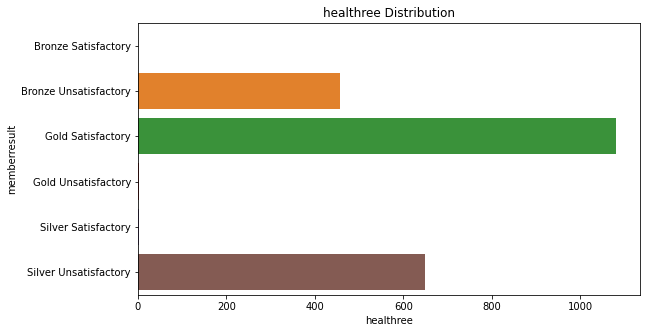

In [ ]:
df = trial_full.groupby('memberresult').agg('mean').sort_values(by = 'memberresult', ascending = True).reset_index()

plt.figure(figsize = (9,5))
p = sns.barplot(
    y = 'memberresult',
    x = 'healthree',
    data = df
)
plt.title('healthree Distribution')
plt.show()

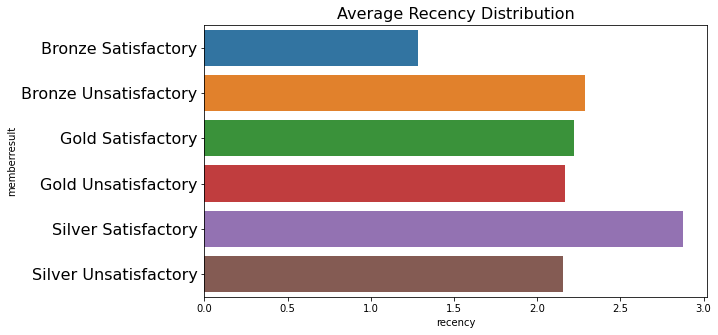

In [ ]:
df = trial_full.groupby('memberresult').agg('mean').sort_values(by = 'memberresult', ascending = True).reset_index()

plt.figure(figsize = (9,5))
p = sns.barplot(
    y = 'memberresult',
    x = 'recency',
    data = df
)
plt.title('Average Recency Distribution',fontsize = 16)
plt.yticks(fontsize=16, rotation=0)
plt.show()

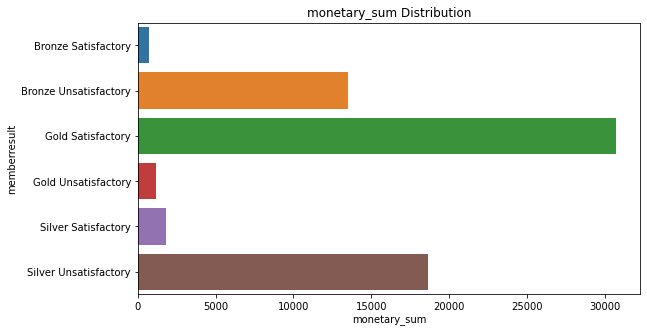

In [ ]:
df = trial_full.groupby('memberresult').agg('mean').sort_values(by = 'memberresult', ascending = True).reset_index()

plt.figure(figsize = (9,5))
p = sns.barplot(
    y = 'memberresult',
    x = 'monetary_sum',
    data = df
)
plt.title('monetary_sum Distribution')
plt.show()

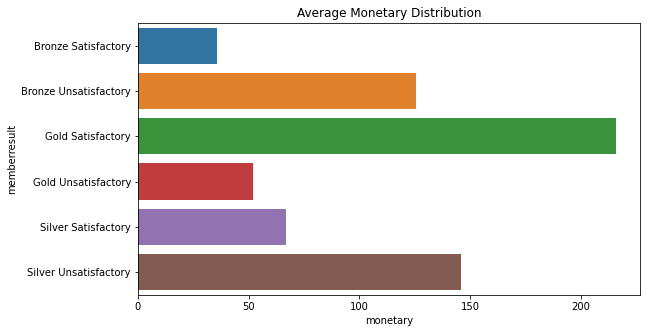

In [ ]:
df = trial_full.groupby('memberresult').agg('mean').sort_values(by = 'memberresult', ascending = True).reset_index()

plt.figure(figsize = (9,5))
p = sns.barplot(
    y = 'memberresult',
    x = 'monetary',
    data = df
)
plt.title('Average Monetary Distribution')
plt.show()

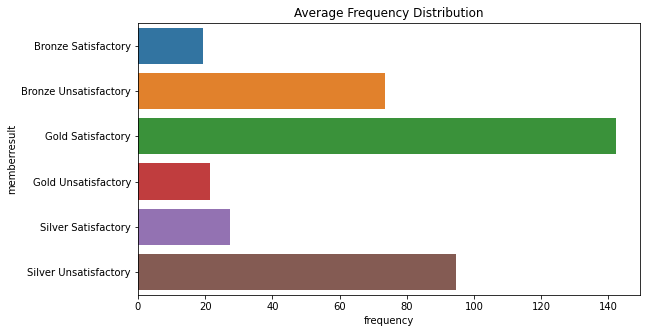

In [ ]:
df = trial_full.groupby('memberresult').agg('mean').sort_values(by = 'memberresult', ascending = True).reset_index()

plt.figure(figsize = (9,5))
p = sns.barplot(
    y = 'memberresult',
    x = 'frequency',
    data = df
)
plt.title('Average Frequency Distribution')
plt.show()

In [ ]:
trial_full.head()

,customer_id_x,membership_class_trial,result,frequency,monetary,monetary_sum,recency,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15,item16,item17,item18,item19,item20,item21,item22,item23,item24,item25,item26,item27,item28,item29,item30,egg,dairy,breads,fruit_veg,sugar_spices,cook_oil,joe_farn,veg_choice,auckland,pure_green,healthree,customer_id_y,customer_name,customer_gender,customer_email,customer_region,customer_age,customer_occupation,member-result,memberresult
0,997579682270,Silver,Unsatisfactory,28,46.464286,1301,1,17,3,0,0,4,3,15,13,7,7,3,6,6,1,10,0,2,6,0,1,0,0,0,0,0,0,0,0,0,0,40,22,17,9,9,15,29,57,25,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Unsatisfactory,Silver Unsatisfactory
1,997458045673,Silver,Unsatisfactory,25,41.400000,1035,3,0,13,3,1,9,1,14,1,3,4,4,0,8,10,7,7,0,3,0,0,2,0,0,0,0,0,0,0,0,0,22,24,16,12,13,4,27,27,35,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Unsatisfactory,Silver Unsatisfactory
2,996882350315,Silver,Unsatisfactory,21,33.285714,699,3,9,7,0,6,3,0,3,0,5,1,8,2,1,6,1,8,0,3,0,0,0,0,0,0,0,0,0,0,0,0,13,13,7,18,11,5,25,20,22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Unsatisfactory,Silver Unsatisfactory
3,996783659998,Silver,Unsatisfactory,19,40.368421,767,2,10,8,0,0,1,7,1,1,4,5,0,2,3,4,5,0,6,1,0,0,0,0,0,0,0,3,0,0,0,3,14,17,9,5,7,14,26,14,20,0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Unsatisfactory,Silver Unsatisfactory
4,996331197257,Silver,Unsatisfactory,18,30.777778,554,4,1,6,0,7,1,0,3,5,4,1,0,3,1,0,2,0,4,5,0,1,0,5,0,0,0,0,0,0,0,0,5,13,6,13,5,8,15,17,12,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silver Unsatisfactory,Silver Unsatisfactory


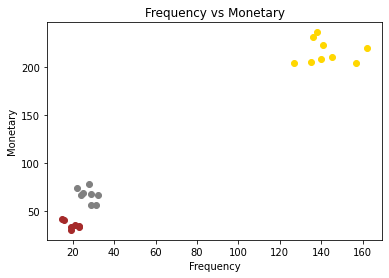

In [ ]:
#filter rows of original data
filtered_label1 = trial_full[(trial_full['result'] == 'Satisfactory') & (trial_full['membership_class_trial'] == 'Silver')]
filtered_label2 = trial_full[(trial_full['result'] == 'Satisfactory') & (trial_full['membership_class_trial'] == 'Gold')]
filtered_label3 = trial_full[(trial_full['result'] == 'Satisfactory') & (trial_full['membership_class_trial'] == 'Bronze')]

# clust_cent = km.cluster_centers_
 
#Plotting the results
plt.scatter(filtered_label1['frequency'] , filtered_label1['monetary'] , color = 'gray')
plt.scatter(filtered_label2['frequency'] , filtered_label2['monetary'] , color = 'gold')
plt.scatter(filtered_label3['frequency'] , filtered_label3['monetary'] , color = 'brown')

plt.title('Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

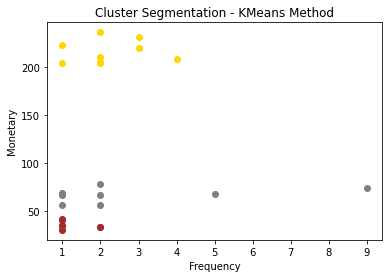

In [ ]:
#filter rows of original data
filtered_label1 = trial_full[(trial_full['result'] == 'Satisfactory') & (trial_full['membership_class_trial'] == 'Silver')]
filtered_label2 = trial_full[(trial_full['result'] == 'Satisfactory') & (trial_full['membership_class_trial'] == 'Gold')]
filtered_label3 = trial_full[(trial_full['result'] == 'Satisfactory') & (trial_full['membership_class_trial'] == 'Bronze')]

# clust_cent = km.cluster_centers_
 
#Plotting the results
plt.scatter(filtered_label1['recency'] , filtered_label1['monetary'] , color = 'gray')
plt.scatter(filtered_label2['recency'] , filtered_label2['monetary'] , color = 'gold')
plt.scatter(filtered_label3['recency'] , filtered_label3['monetary'] , color = 'brown')

plt.title('Cluster Segmentation - KMeans Method')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

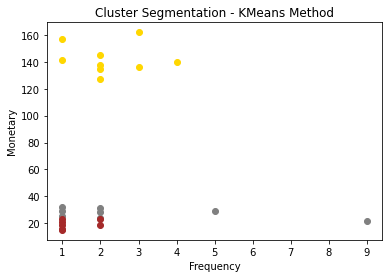

In [ ]:
#filter rows of original data
filtered_label1 = trial_full[(trial_full['result'] == 'Satisfactory') & (trial_full['membership_class_trial'] == 'Silver')]
filtered_label2 = trial_full[(trial_full['result'] == 'Satisfactory') & (trial_full['membership_class_trial'] == 'Gold')]
filtered_label3 = trial_full[(trial_full['result'] == 'Satisfactory') & (trial_full['membership_class_trial'] == 'Bronze')]

# clust_cent = km.cluster_centers_
 
#Plotting the results
plt.scatter(filtered_label1['recency'] , filtered_label1['frequency'] , color = 'gray')
plt.scatter(filtered_label2['recency'] , filtered_label2['frequency'] , color = 'gold')
plt.scatter(filtered_label3['recency'] , filtered_label3['frequency'] , color = 'brown')

plt.title('Cluster Segmentation - KMeans Method')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

# Applying rules to 8000 cust

In [ ]:
trx_per_cust['tier'] = ""

In [ ]:
for i in range(len(trx_per_cust)):
  if trx_per_cust['monetary'][i] < 45.955555:
    trx_per_cust['tier'][i] = "Bronze"

  elif (trx_per_cust['frequency'][i]>=31) & (trx_per_cust['monetary'][i]>=70.723):
    trx_per_cust['tier'][i] = "Gold"

  else:
    trx_per_cust['tier'][i] = "Silver"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
trx_per_cust

,cust_id,frequency,monetary,monetary_sum,recency,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15,item16,item17,item18,item19,item20,item21,item22,item23,item24,item25,item26,item27,item28,item29,item30,egg,dairy,breads,fruit_veg,sugar_spices,cook_oil,joe_farn,veg_choice,auckland,pure_green,healthree,tier
0,2.579917e+08,21,40.000000,840,2,16,11,0,5,12,1,2,2,1,5,1,0,9,4,4,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,28,18,5,12,13,4,47,11,20,0,2,Bronze
1,2.728059e+08,26,64.538462,1678,2,3,0,9,0,5,5,8,5,14,3,0,0,12,13,24,21,10,1,0,2,4,4,2,0,0,0,0,0,0,0,23,21,51,28,17,6,22,31,81,12,0,Silver
2,4.525937e+08,28,38.964286,1091,2,10,12,3,0,8,7,1,8,1,0,4,5,6,7,2,9,14,1,2,0,0,0,0,0,0,0,1,0,0,1,19,27,7,9,28,14,40,19,41,2,2,Bronze
3,4.778588e+08,27,73.333333,1980,1,8,4,2,4,0,3,2,10,12,11,4,4,12,24,9,2,7,11,4,1,0,0,0,3,0,0,0,0,0,2,27,53,24,17,11,25,21,53,73,8,2,Silver
4,5.714988e+08,17,56.941176,968,2,6,14,0,2,3,9,8,8,8,4,0,4,6,2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,24,17,6,3,13,34,32,17,0,0,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8846,9.992319e+11,31,77.258065,2395,1,0,2,2,6,0,0,8,11,9,2,5,0,16,32,15,24,10,7,3,11,7,5,0,5,0,0,1,0,0,0,27,60,35,37,15,12,10,35,109,31,1,Gold
8847,9.993219e+11,23,33.521739,771,2,8,8,0,6,0,3,7,3,6,4,9,1,6,0,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,21,13,15,11,10,4,27,34,13,0,0,Bronze
8848,9.994246e+11,16,40.500000,648,1,5,10,3,0,0,6,7,0,3,2,1,0,8,0,4,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,23,10,10,4,1,9,25,17,14,1,0,Bronze
8849,9.995026e+11,23,34.913043,803,1,2,8,0,1,1,18,4,5,8,1,1,3,0,0,1,5,3,7,0,0,0,0,0,0,1,0,0,0,0,0,7,13,9,9,5,28,30,22,18,0,1,Bronze


In [ ]:
trx_per_cust.groupby('tier').agg(len)['cust_id']

tier
Bronze    2213.0
Gold       949.0
Silver    5689.0
Name: cust_id, dtype: float64

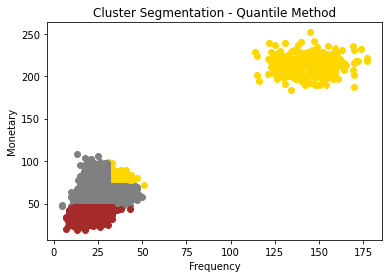

In [ ]:
#filter rows of original data
filtered_label1 = trx_per_cust[trx_per_cust['tier'] == 'Gold']
filtered_label2 = trx_per_cust[trx_per_cust['tier'] == 'Silver']
filtered_label3 = trx_per_cust[trx_per_cust['tier'] == 'Bronze']

clust_cent = km.cluster_centers_
 
#Plotting the results
plt.scatter(filtered_label1['frequency'] , filtered_label1['monetary'] , color = 'gold')
plt.scatter(filtered_label2['frequency'] , filtered_label2['monetary'] , color = 'gray')
plt.scatter(filtered_label3['frequency'] , filtered_label3['monetary'] , color = 'brown')

plt.title('Cluster Segmentation - Quantile Method')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

In [ ]:
#filter rows of original data
filtered_label1 = trx_per_cust[trx_per_cust['tier'] == 'Gold'].reset_index(drop = True)
filtered_label2 = trx_per_cust[trx_per_cust['tier'] == 'Silver'].reset_index(drop = True)
filtered_label3 = trx_per_cust[trx_per_cust['tier'] == 'Bronze'].reset_index(drop = True)

label1cent = [filtered_label1['recency'].mean(), filtered_label1['frequency'].mean(),filtered_label1['monetary'].mean()]
label2cent = [filtered_label2['recency'].mean(), filtered_label2['frequency'].mean(),filtered_label2['monetary'].mean()]
label3cent = [filtered_label3['recency'].mean(), filtered_label3['frequency'].mean(),filtered_label3['monetary'].mean()]

label1wcss = 0
for i in range(len(filtered_label1)):
  label1wcss += (filtered_label1['recency'][i] - label1cent[0])**2
  label1wcss += (filtered_label1['frequency'][i] - label1cent[1])**2
  label1wcss += (filtered_label1['monetary'][i] - label1cent[2])**2

label2wcss = 0
for i in range(len(filtered_label2)):
  label2wcss += (filtered_label2['recency'][i] - label2cent[0])**2
  label2wcss += (filtered_label2['frequency'][i] - label2cent[1])**2
  label2wcss += (filtered_label2['monetary'][i] - label2cent[2])**2

label3wcss = 0
for i in range(len(filtered_label3)):
  label3wcss += (filtered_label3['recency'][i] - label3cent[0])**2
  label3wcss += (filtered_label3['frequency'][i] - label3cent[1])**2
  label3wcss += (filtered_label3['monetary'][i] - label3cent[2])**2

# Final WCSS
print(f'{round(label1wcss,3):,}')
print(f'{round(label2wcss,3):,}')
print(f'{round(label3wcss,3):,}')
print(f'{round(label1wcss + label2wcss +label3wcss,3):,}')

6,502,559.743
751,181.36
105,191.984
7,358,933.087


In [ ]:
label3cent

[2.122006326253954, 20.197921373700858, 37.99350320279911]